In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 
import seaborn as sns

In [2]:
df=pd.read_csv('churn_prediction.csv')
df.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
df.dtypes[df.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [5]:
df.customer_nw_category=df.customer_nw_category.astype('category')

In [6]:
df.branch_code=df.branch_code.astype('category')
df.churn=df.churn.astype('category')

In [7]:
df.dtypes[df.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [8]:
df.city=df.city.astype('category')

In [9]:
df.dtypes[df.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [10]:
df.gender=df.gender.astype('category')
df.occupation=df.occupation.astype('category')

In [11]:
date=pd.DatetimeIndex(df.last_transaction)

In [12]:
df['day_of_year']=date.dayofyear

In [13]:
df['day_of_week']=date.dayofweek

In [14]:
df['month_of_year']=date.month

In [15]:
df.drop(columns=['last_transaction'],inplace=True)

In [16]:
df.select_dtypes(include=['int64','float64',]).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
day_of_year                       float64
day_of_week                       float64
month_of_year                     float64
dtype: object

In [17]:
customer_details=['customer_id','vintage','age','dependents']
current_month=['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month=['previous_month_end_balance','previous_month_credit','previous_month_balance','previous_month_debit']
prev_quarter=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date=['day_of_year','day_of_week','month_of_year']

In [18]:
def univariate_analysis(var):
    size=len(var)
    plt.figure(figsize = (7*size,15), dpi = 300)
    for i , j in enumerate(var):
        max=df[j].max()
        min=df[j].min()
        std=df[j].std()
        skew=df[j].skew()
        kurtosis=df[j].kurtosis()
        median=df[j].median()
        mean=df[j].mean()
        range=max-min

        plt.subplot(2,math.ceil(size/2),i+1)
        sns.kdeplot(df[j])
        sns.lineplot(x=(mean-std,mean+std),y=[0,0],color='red',label='Std')
        sns.scatterplot(x=[min,max],y=[0,0],color='orange',label='MIN/MAX')
        sns.scatterplot(x=[mean],y=[0],color='blue',label='mean')
        sns.scatterplot(x=[median],y=[0],color='pink',label='median')
        plt.xlabel('{}'.format(j))
        plt.ylabel('density')
        plt.title('Skew:{} Kurtosis:{} Range:{}'.format(round(skew,2),round(kurtosis,2),round(range,2)))
        plt.legend()

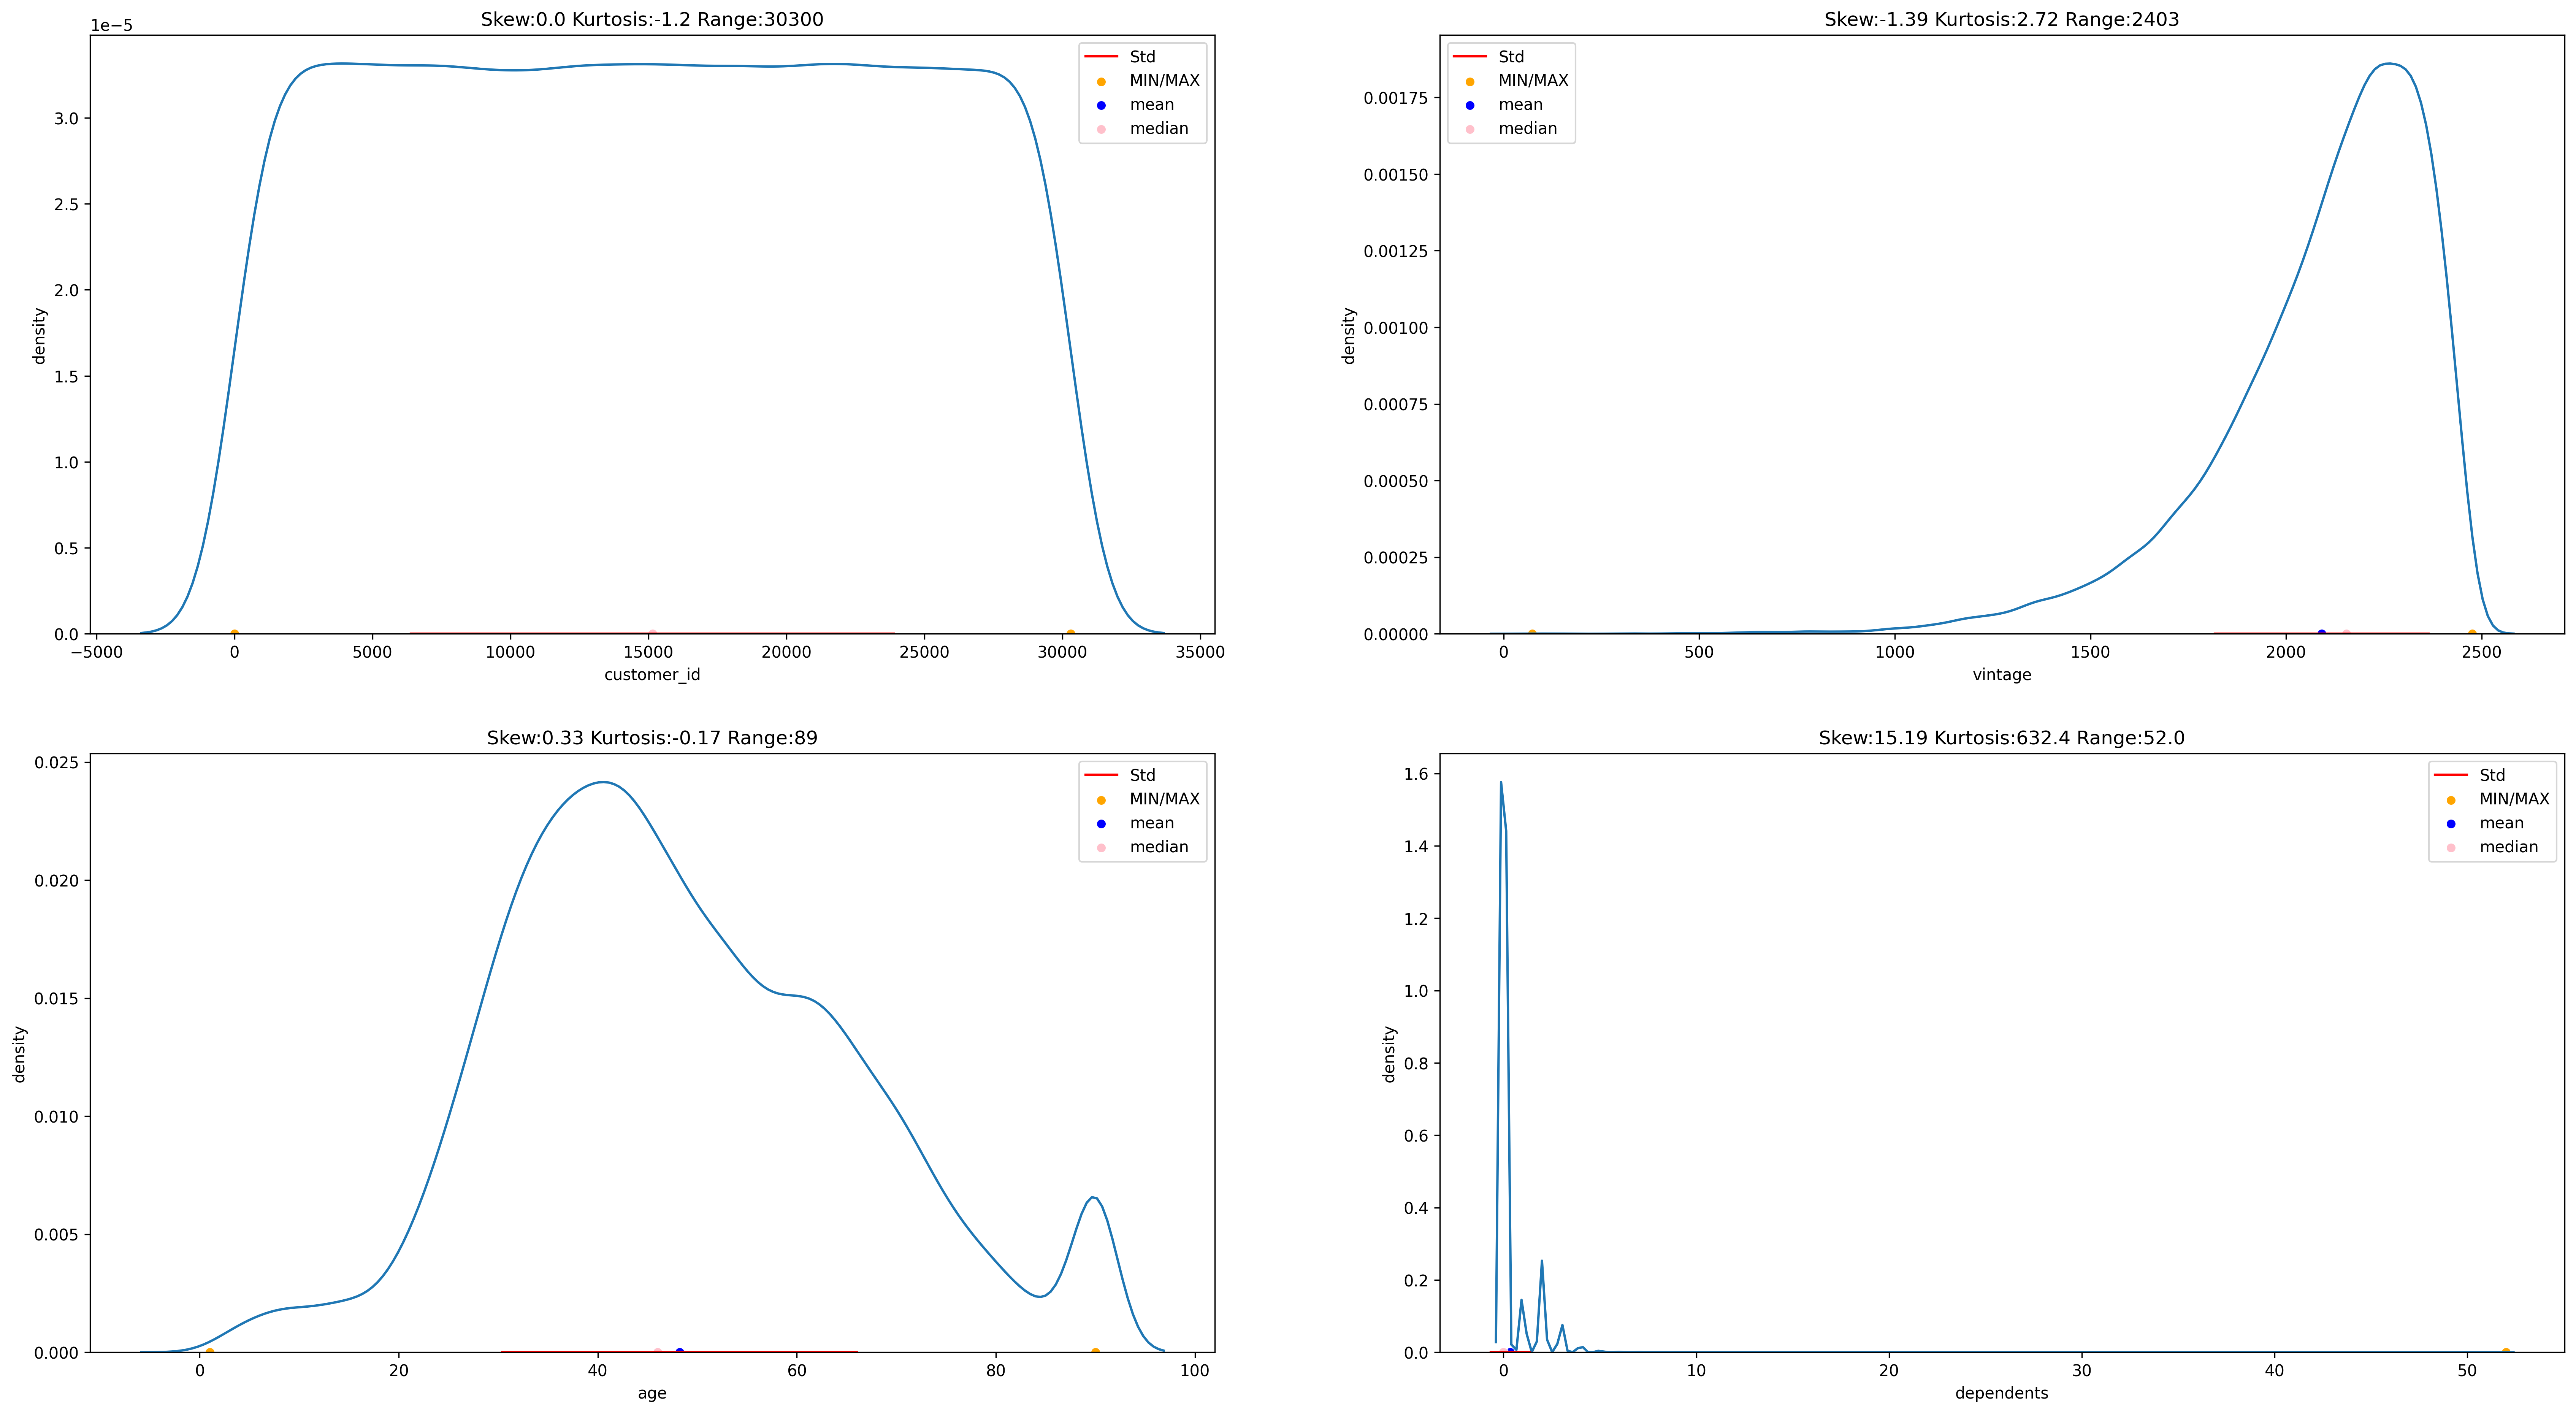

In [19]:
univariate_analysis(customer_details)

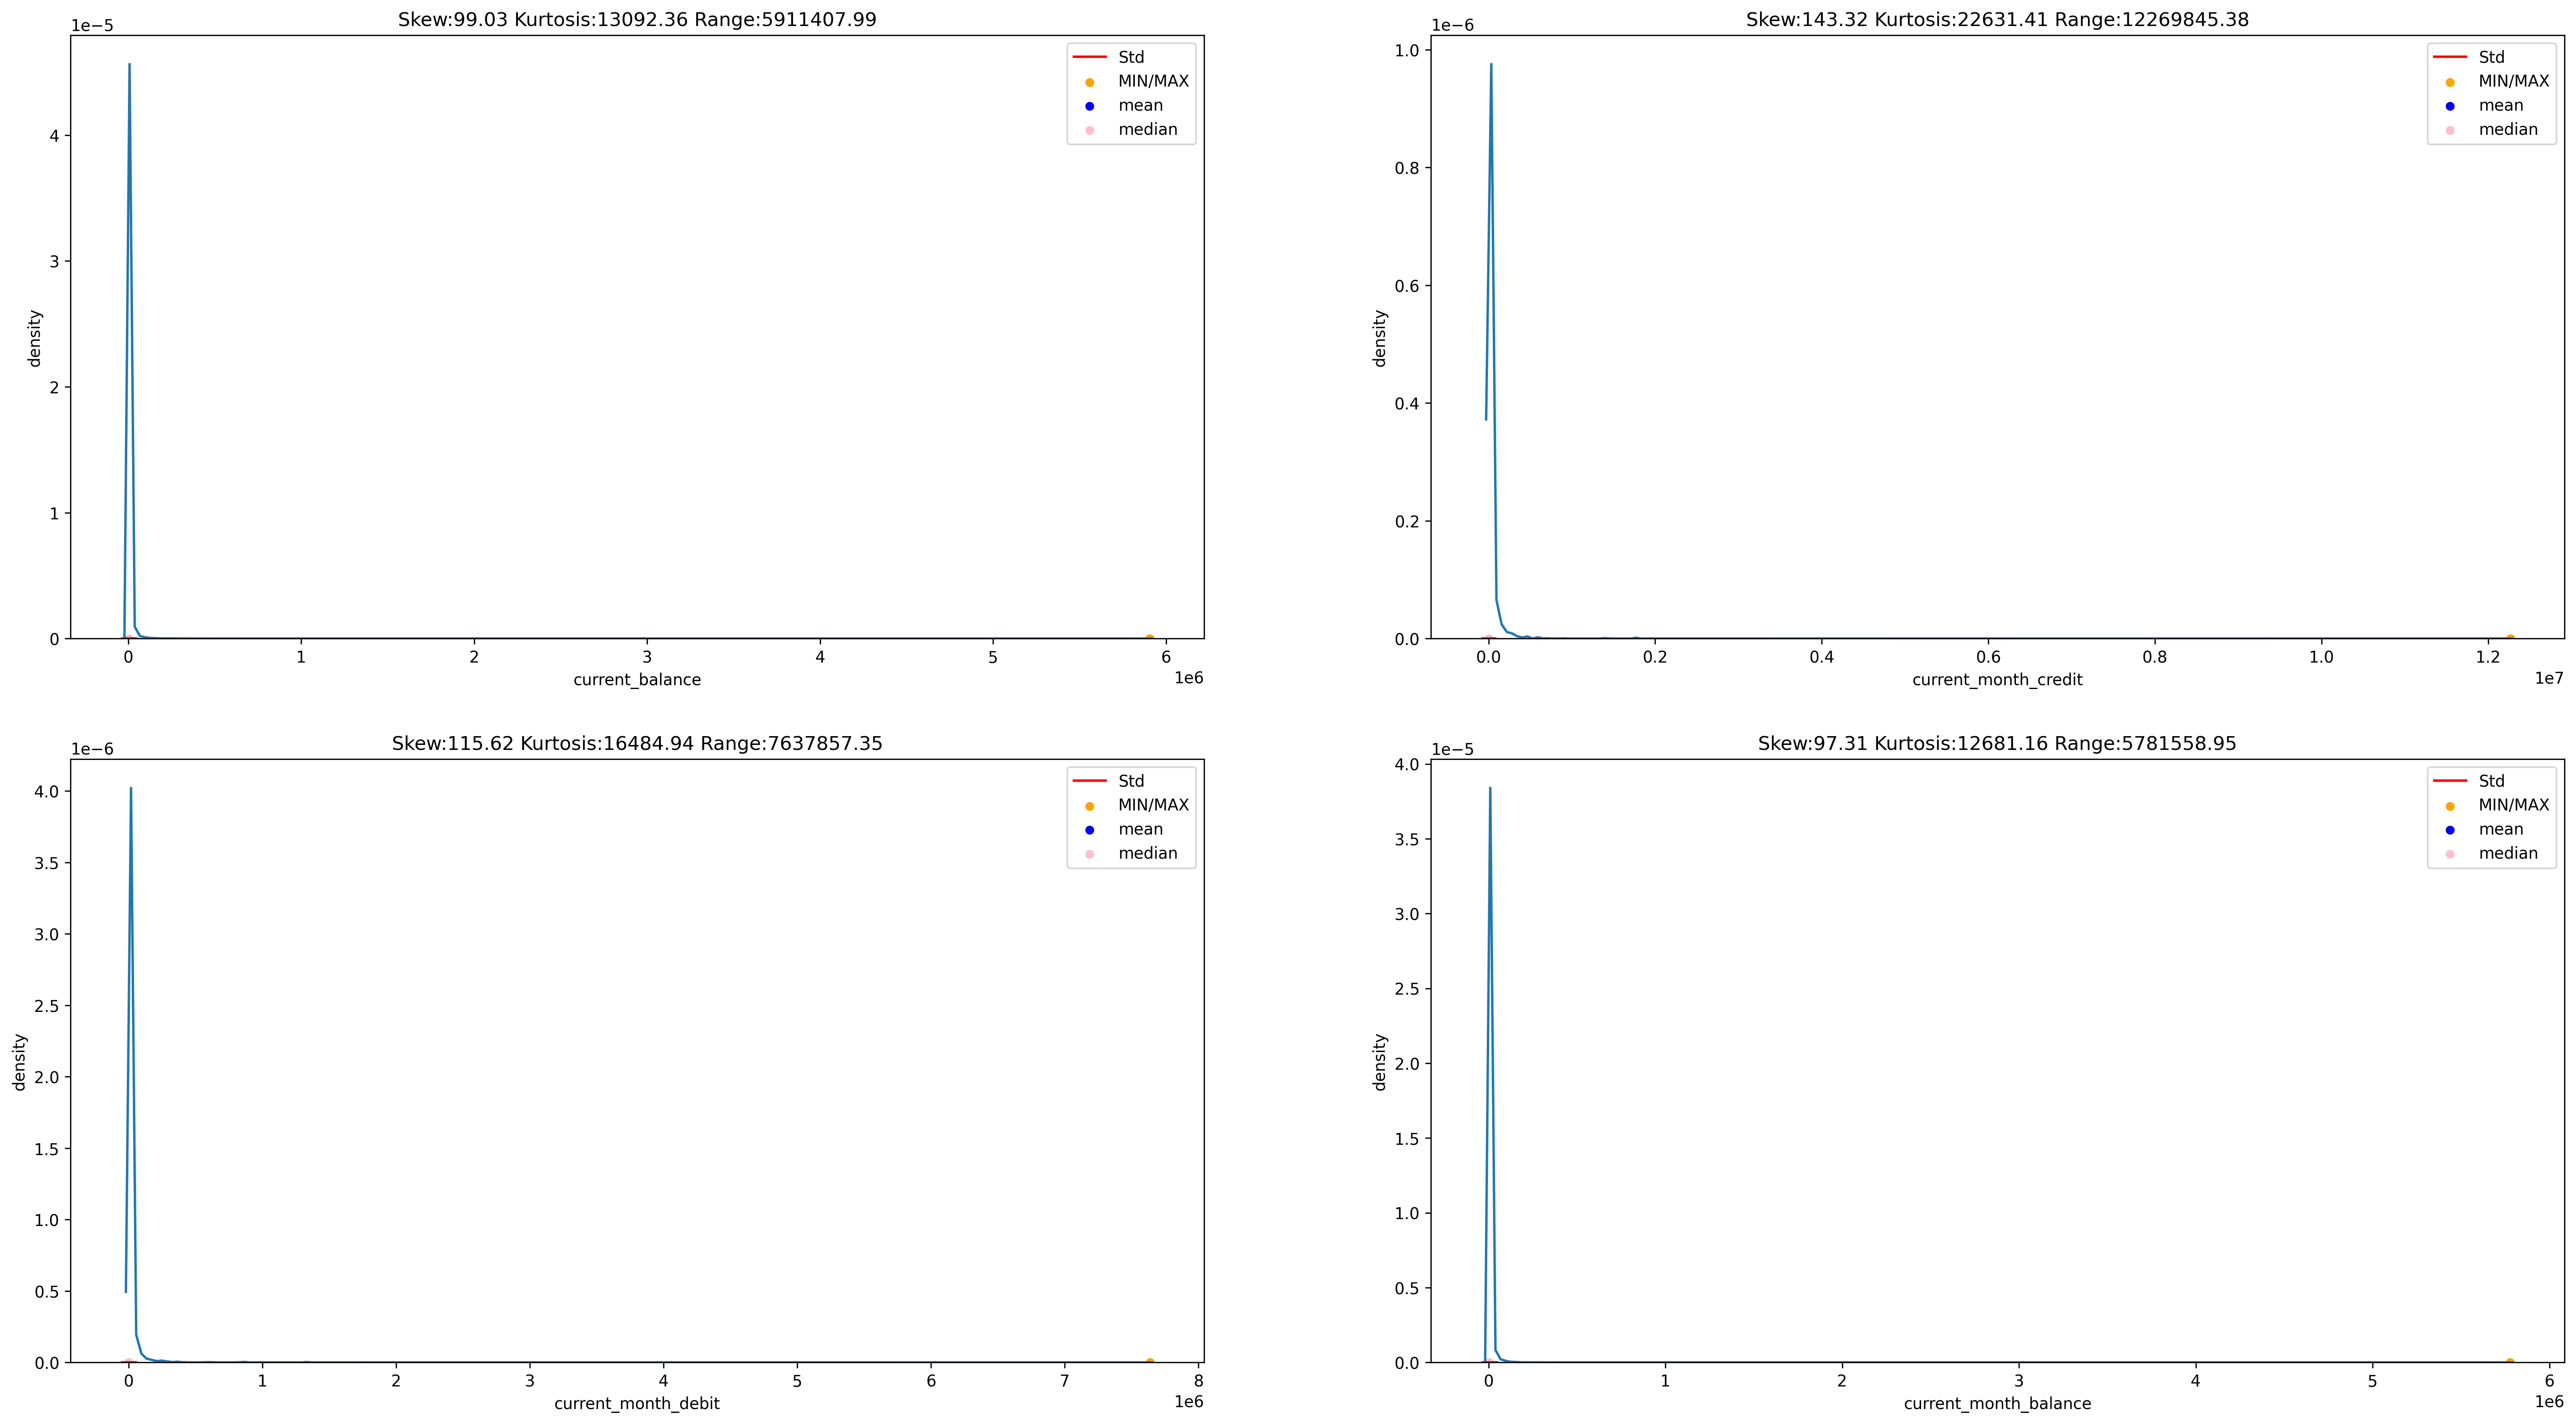

In [20]:
univariate_analysis(current_month)

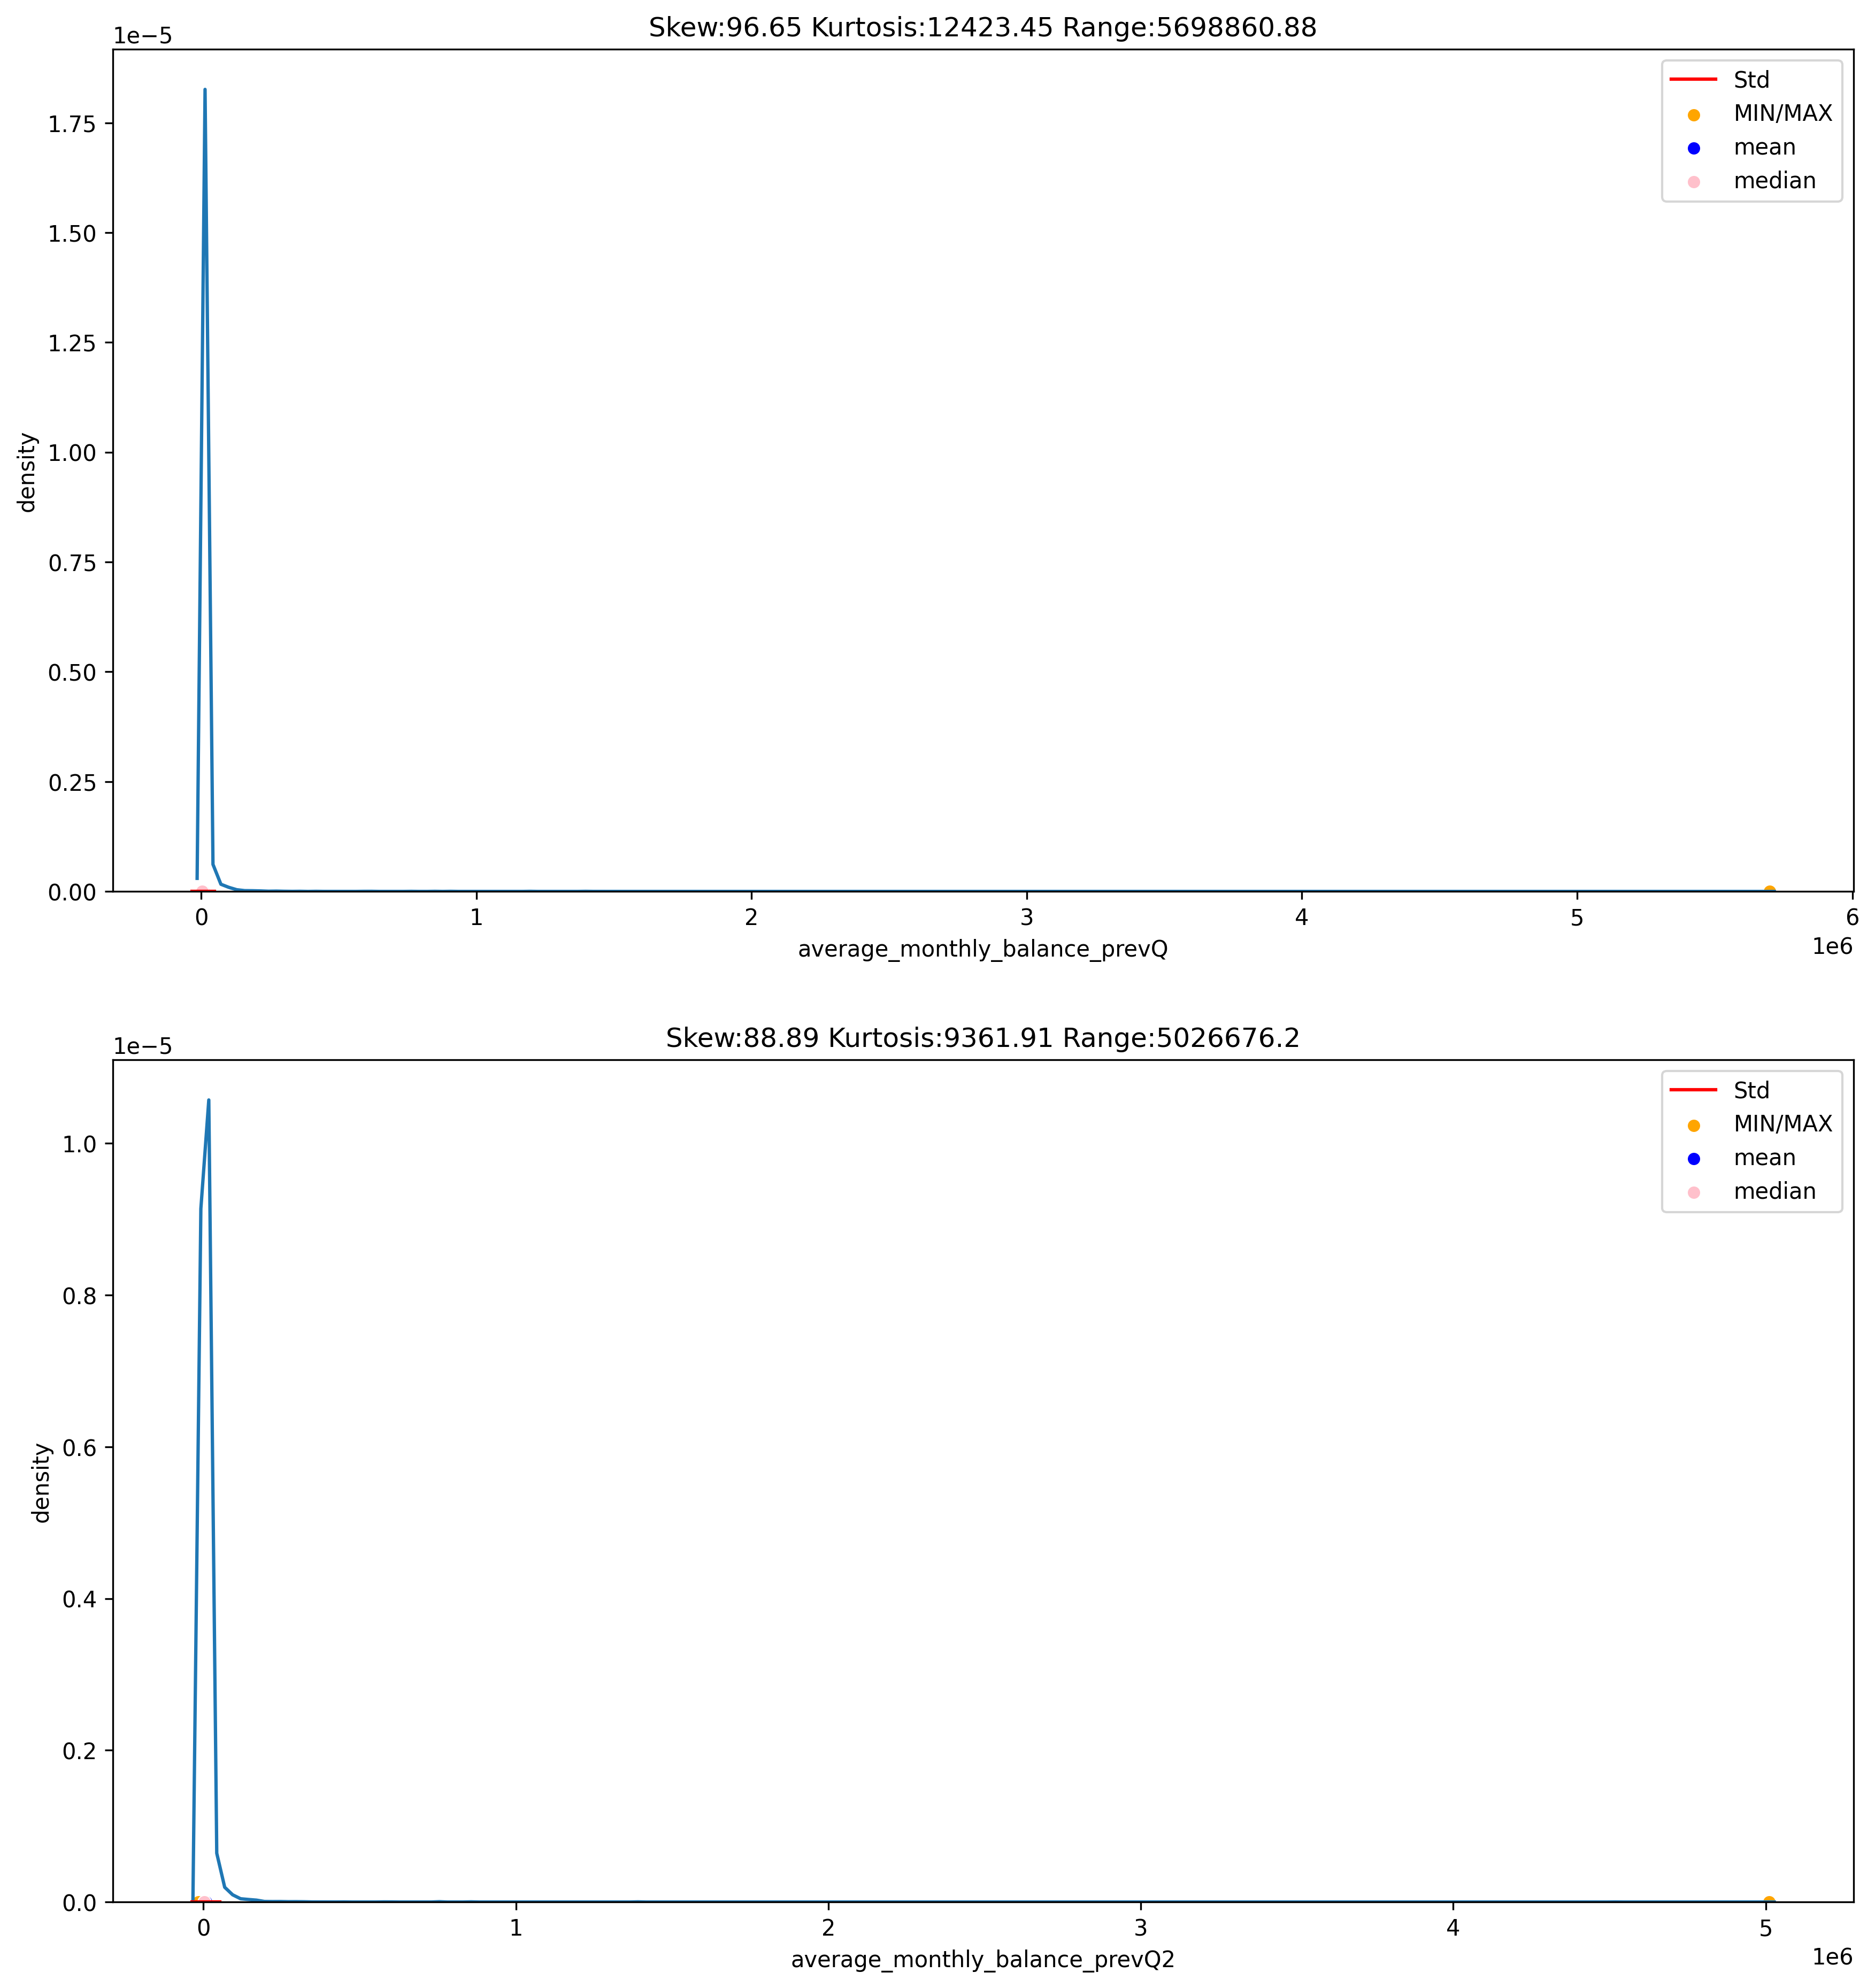

In [21]:
univariate_analysis(prev_quarter)

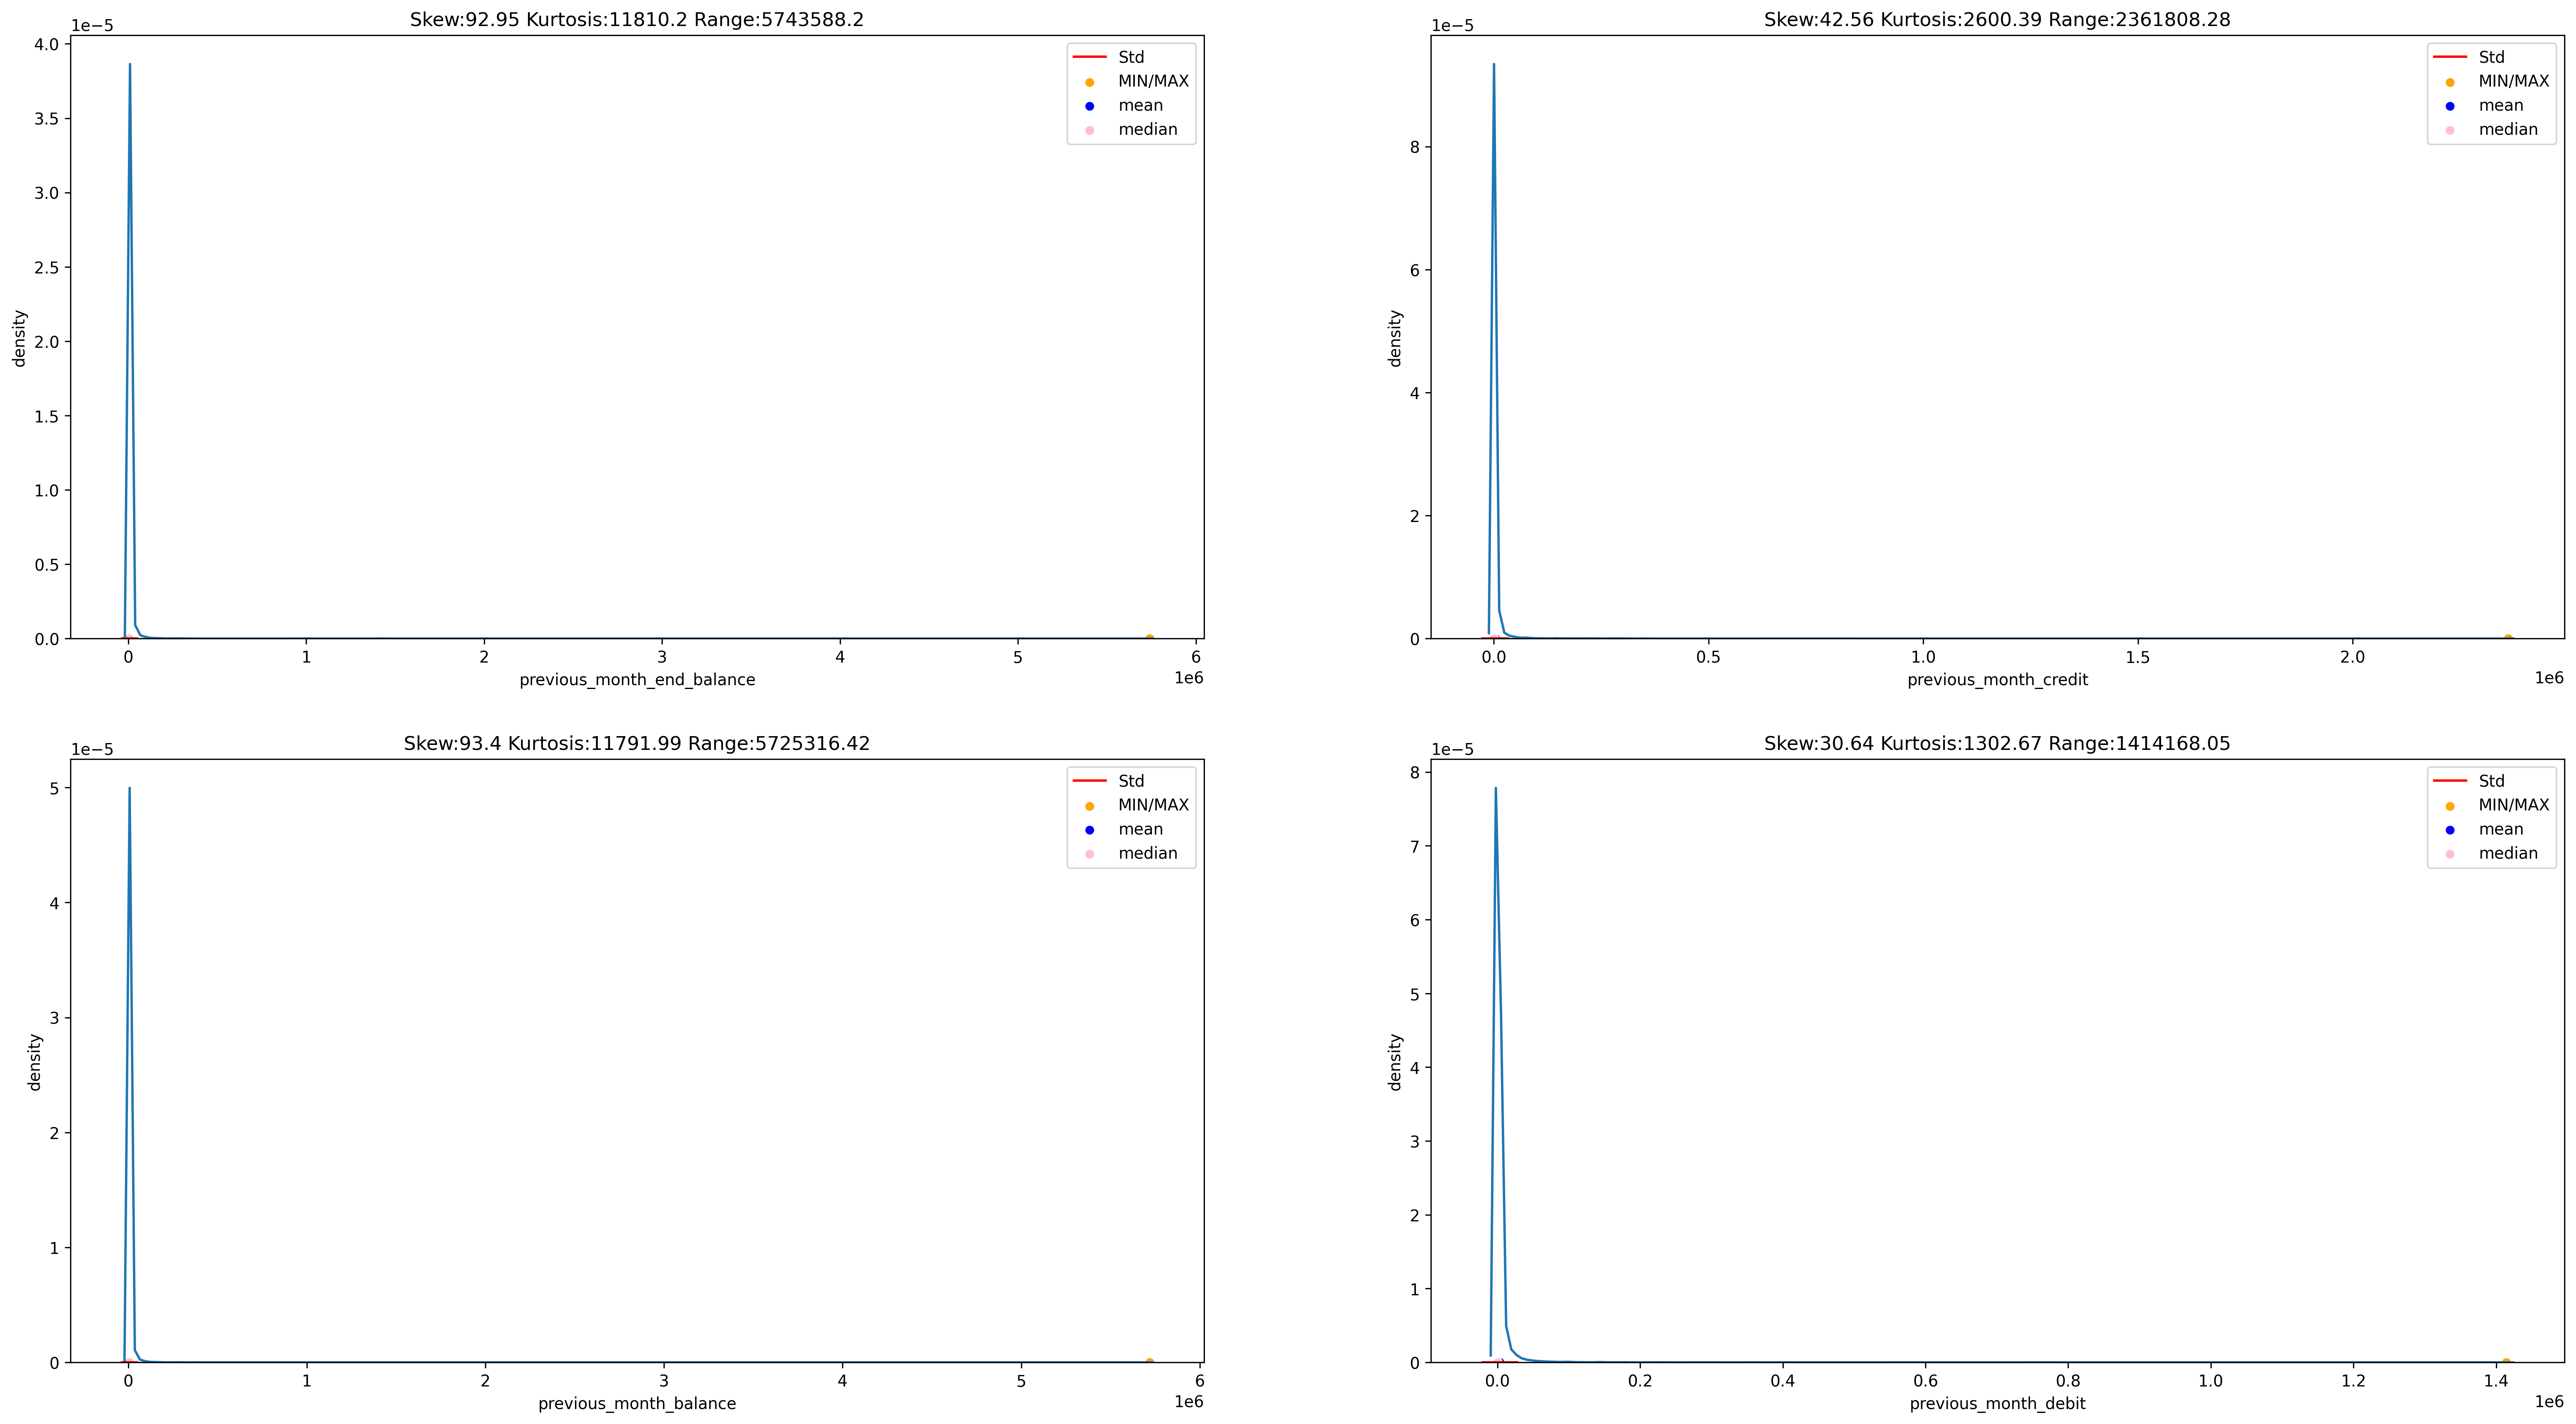

In [22]:
univariate_analysis(previous_month)

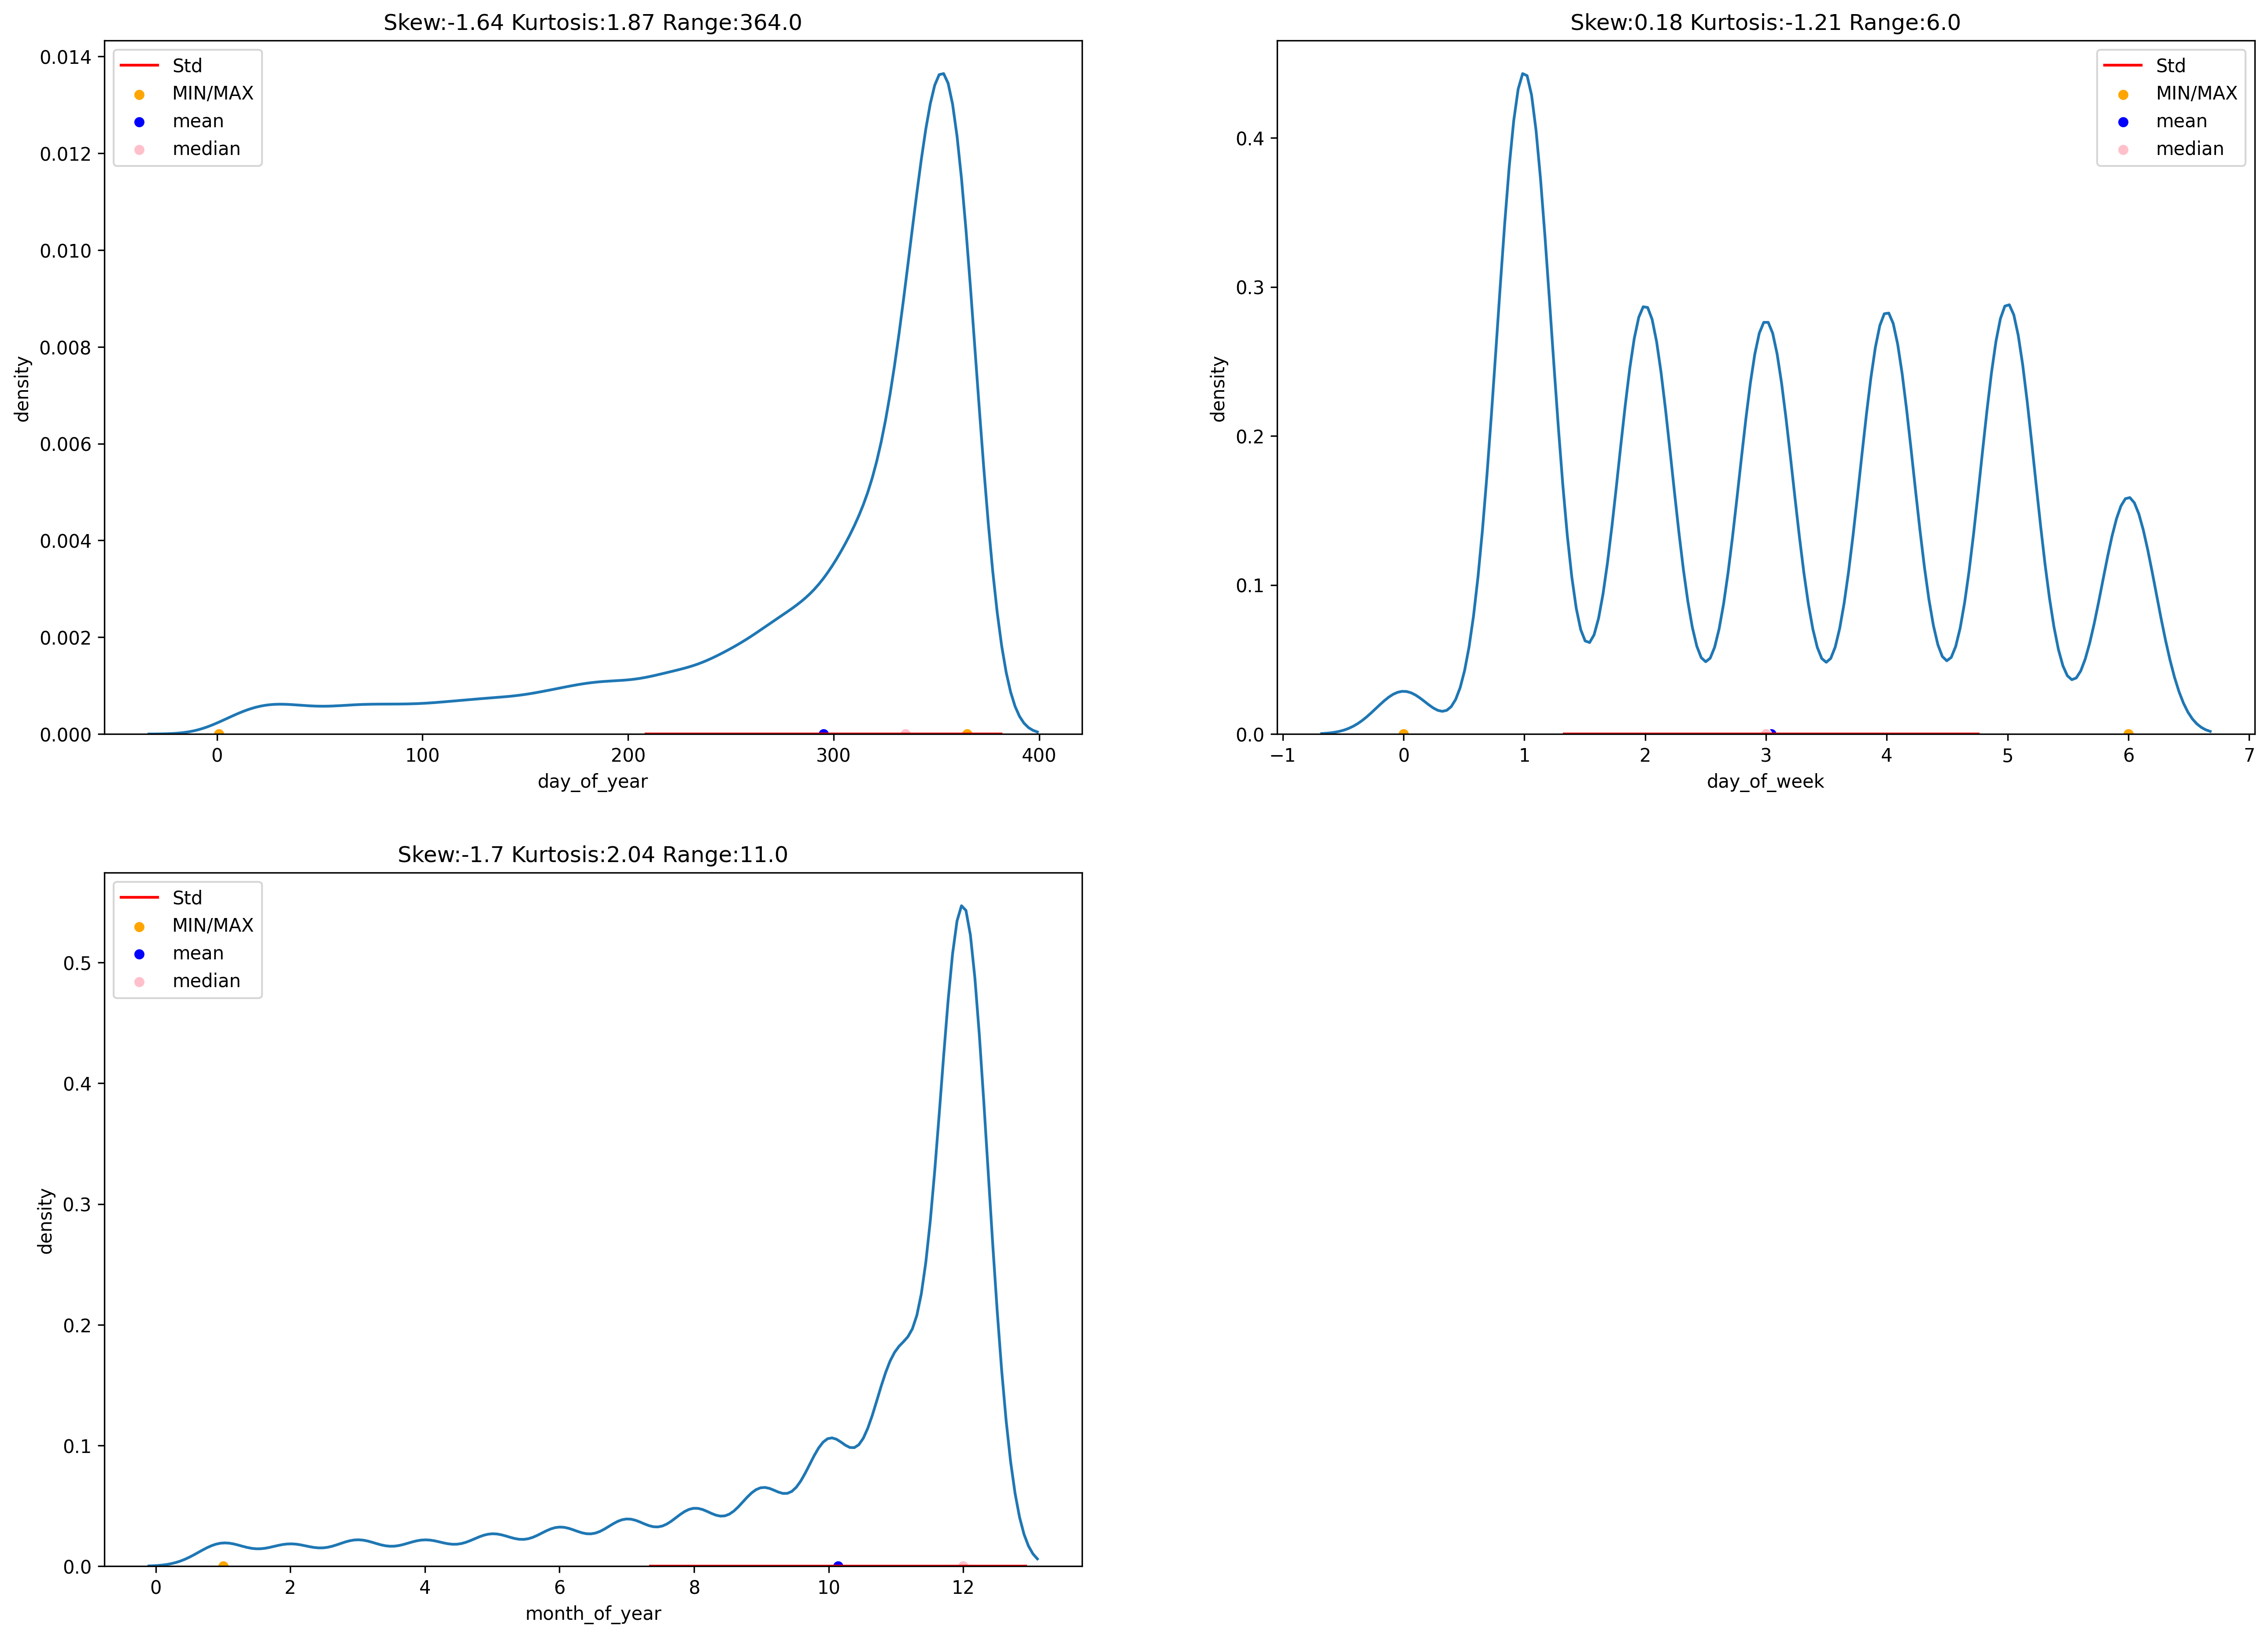

In [23]:
univariate_analysis(transaction_date)

In [24]:
df.dtypes[df.dtypes=='category']

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [25]:
def univariate_analysis(var):
    size=len(var)
    plt.figure(figsize=(7*size,7))
    for i,j in enumerate(var):
        value_counts=df[j].value_counts(normalize=True)
        uniques=df[j].nunique()
        plt.subplot(1,size,i+1)
        sns.barplot(value_counts,order=value_counts.index)
        plt.ylabel('Fraction')
        plt.xlabel(j)
        plt.title('Uniques:{}\n{}'.format(uniques,value_counts))

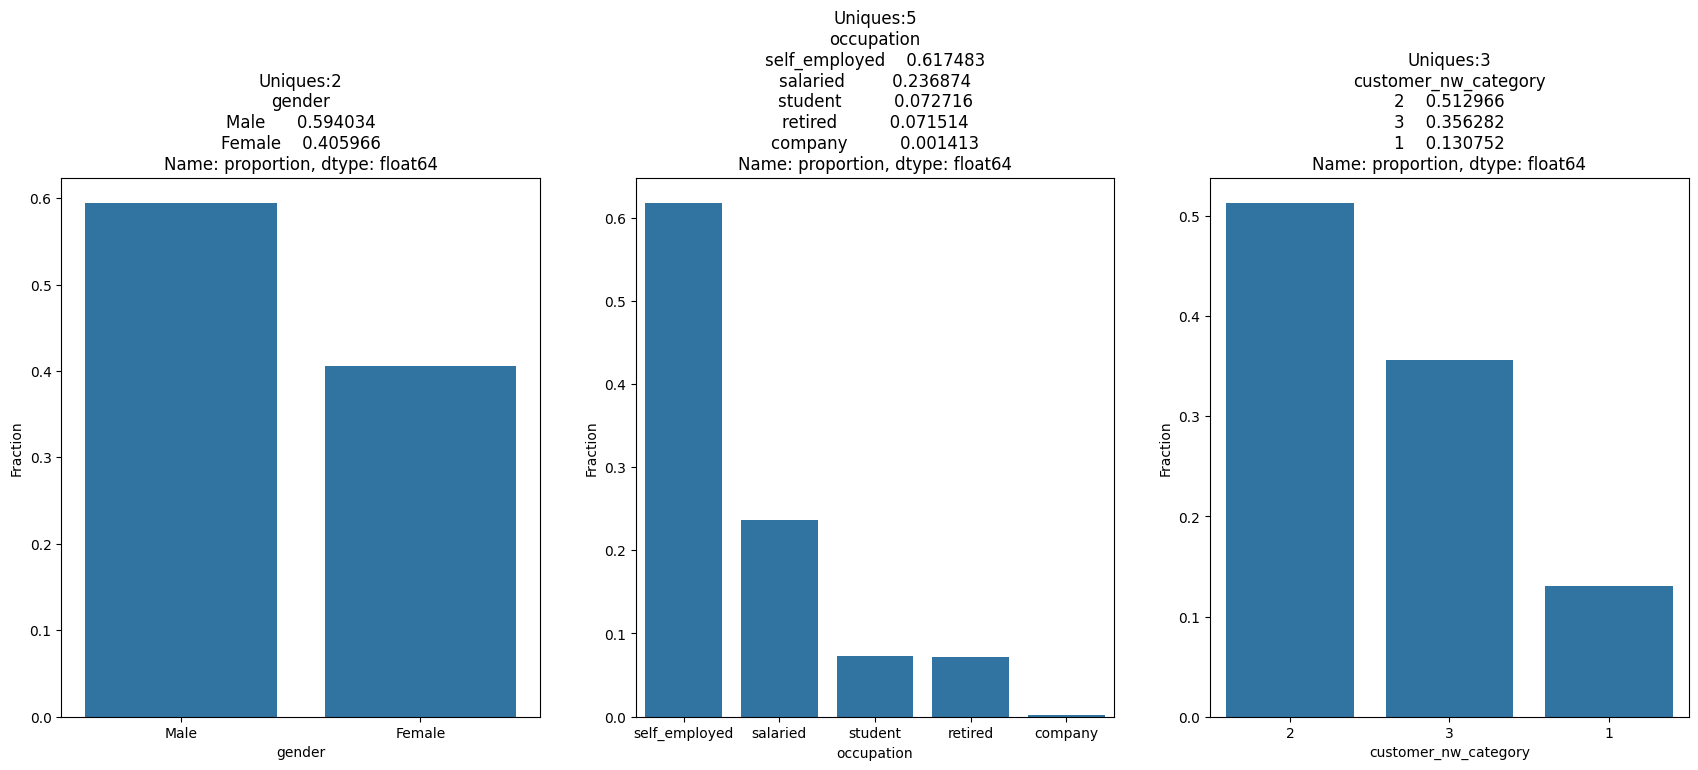

In [26]:
univariate_analysis(['gender','occupation','customer_nw_category'])

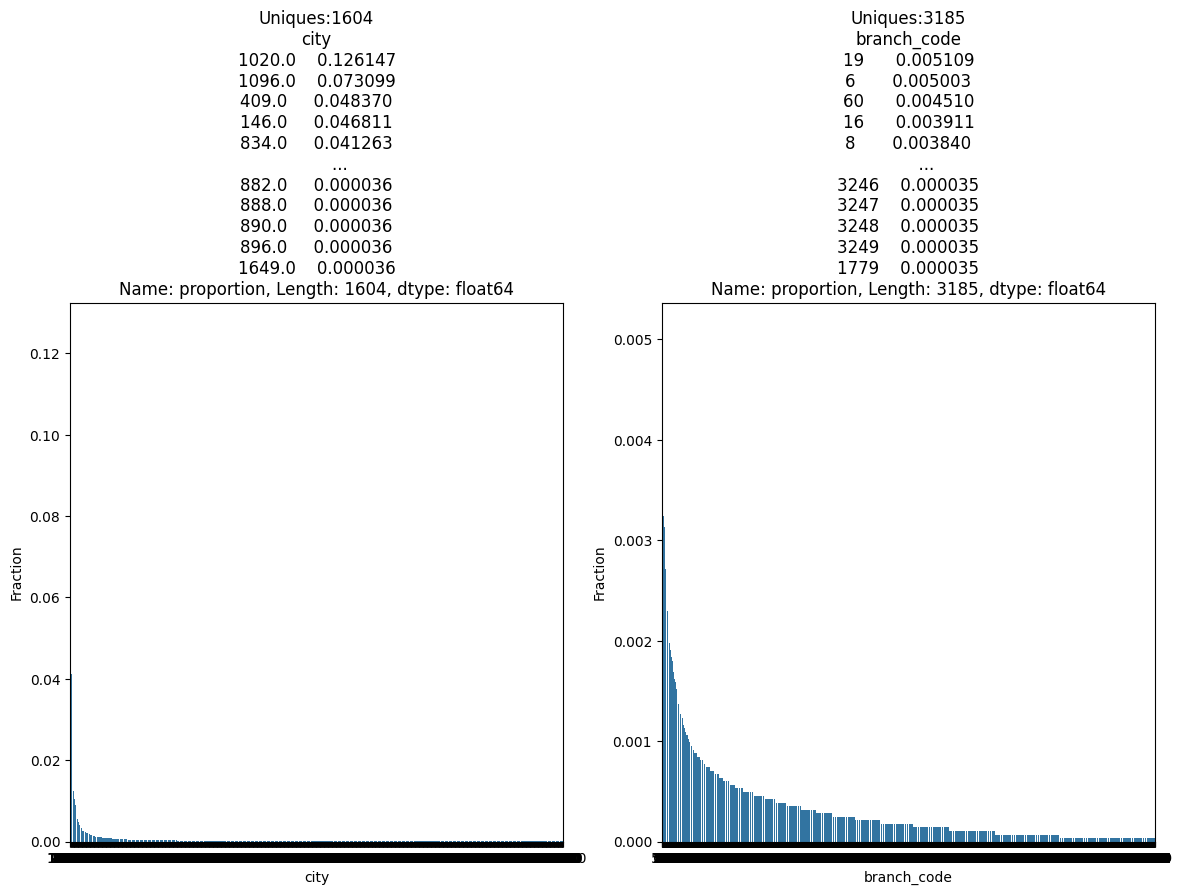

In [27]:
univariate_analysis(['city','branch_code'])

In [28]:
univariate_analysis(['churn'])

In [29]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
day_of_year                       3223
day_of_week                       3223
month_of_year                     3223
dtype: int64

In [30]:
def outlier_analysis(var,inc=False):
    size=len(var)
    plt.figure(figsize=(7*size,math.ceil(size/2)*7))
    for i,j in enumerate(var):
        q25=df[j].quantile(.25)
        q75=df[j].quantile(.75)
        iqr=q75-q25
        u_limit=q25+1.5*iqr
        l_limit=q75-1.5*iqr
        high_count=len(df[df[j]>u_limit])
        low_count=len(df[df[j]<l_limit])
        if inc:
            median=df[j].median()
            plt.subplot(math.ceil(size/2),2,i+1)
            plt.boxplot(df[j])
            plt.title('{} with Outliers\nHighCount:{}  LowCount:{}\nIQR:{}  Median:{}  .25:{}  .75:{}'.format(j,high_count,low_count,round(iqr,2),round(median,2),round(q25,2),round(q75,2)))
        else:
            data=df[j][:]
            data=data.map(lambda x : u_limit if x>u_limit else l_limit if x<l_limit else x)
            plt.subplot(math.ceil(size/2),2,i+1)
            median=data.median()
            plt.boxplot(data)
            plt.title('{} without Outliers\nHighCount:{}  LowCount:{}\nIQR:{}  Median:{}  .25:{}  .75:{}'.format(j,high_count,low_count,round(iqr,2),round(median,2),round(q25,2),round(q75,2)))

In [31]:
outlier_analysis(current_month)

In [32]:
outlier_analysis(previous_month)

In [33]:
outlier_analysis(current_month,True)

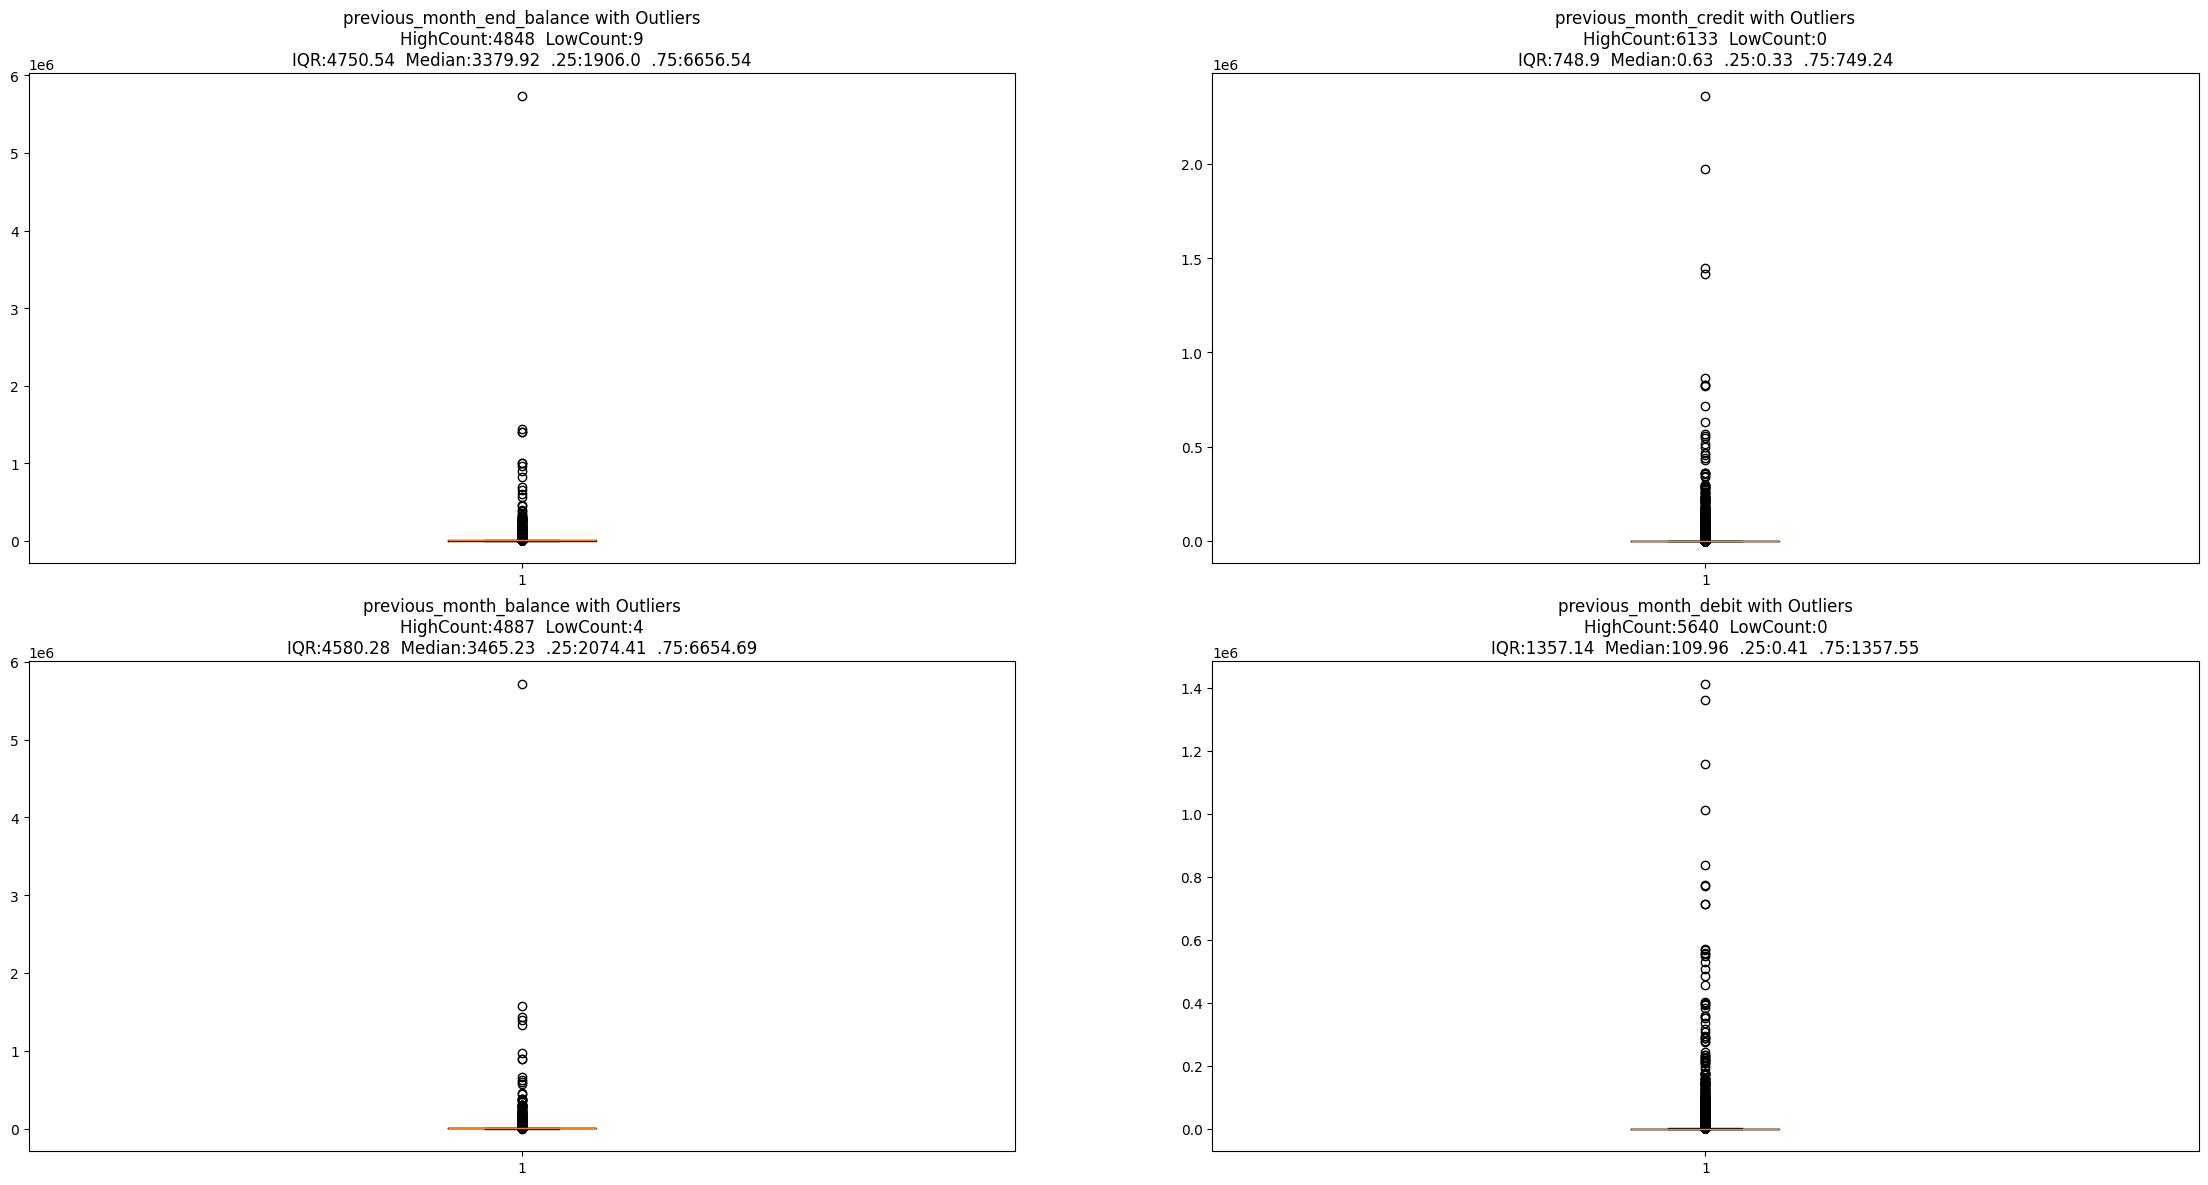

In [34]:
outlier_analysis(previous_month,True)

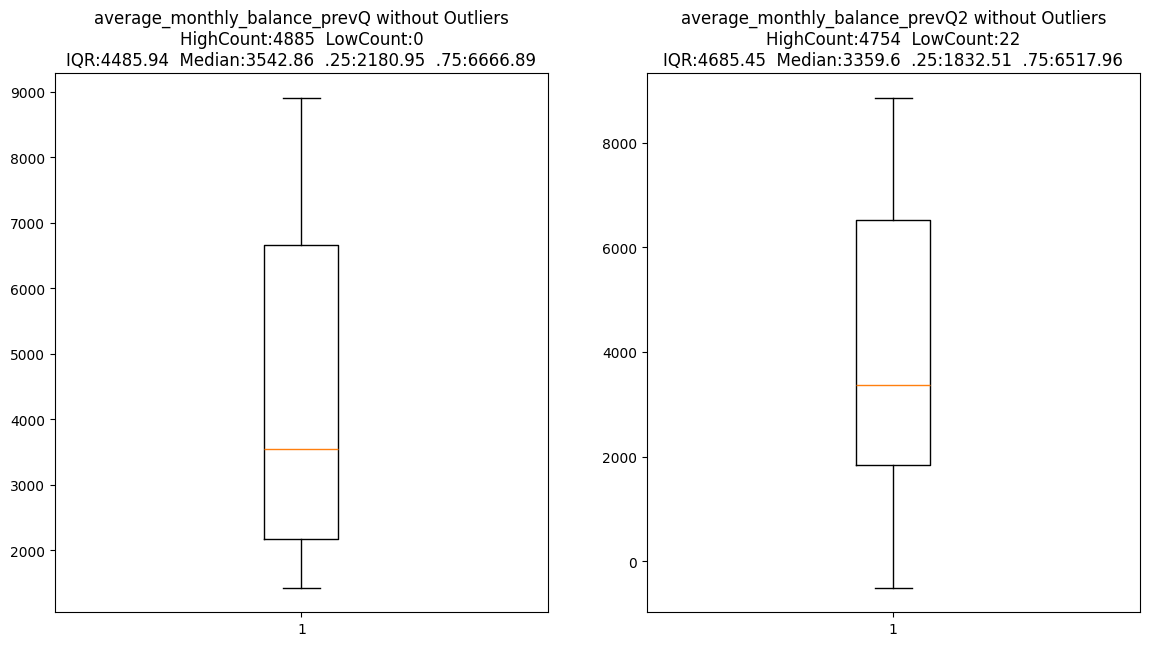

In [35]:
outlier_analysis(prev_quarter)

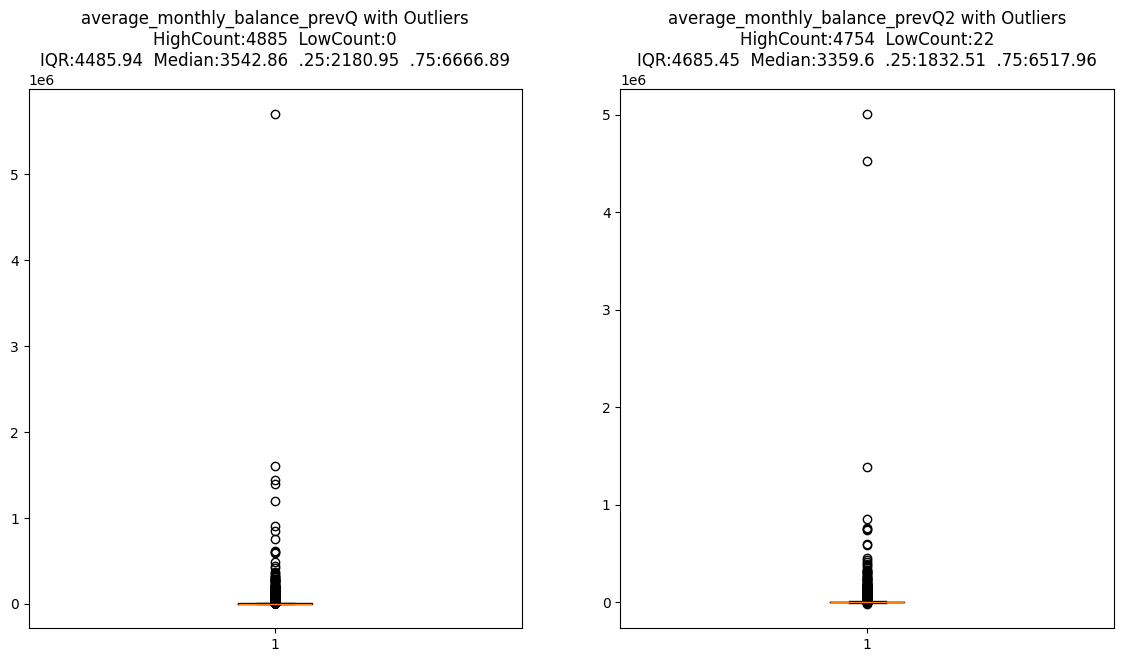

In [36]:
outlier_analysis(prev_quarter,True)

In [37]:
df.drop(columns=['customer_id']).corr(numeric_only=True)

vintage       age  dependents  \
vintage                         1.000000  0.006220    0.005192   
age                             0.006220  1.000000   -0.000612   
dependents                      0.005192 -0.000612    1.000000   
current_balance                 0.000031  0.054346   -0.003070   
previous_month_end_balance     -0.000669  0.058342    0.000216   
average_monthly_balance_prevQ  -0.002054  0.061708    0.001213   
average_monthly_balance_prevQ2 -0.001759  0.059607    0.002949   
current_month_credit           -0.004617  0.023840    0.003260   
previous_month_credit          -0.000169  0.029961    0.025054   
current_month_debit            -0.004978  0.027702    0.008207   
previous_month_debit           -0.006760  0.033296    0.032021   
current_month_balance          -0.000550  0.057662   -0.000652   
previous_month_balance         -0.002208  0.060297    0.001239   
day_of_year                    -0.004435  0.016642    0.079740   
day_of_week                    -0.008596 -0.017958   -0.001702   
month_of_year                  -0.005372  0.017257    0.077978   

                                current_balance  previous_month_end_balance  \
vintage                                0.000031                   -0.000669   
age                                    0.054346                    0.058342   
dependents                            -0.003070                    0.000216   
current_balance                        1.000000                    0.947276   
previous_month_end_balance             0.947276                    1.000000   
average_monthly_balance_prevQ          0.958307                    0.970530   
average_monthly_balance_prevQ2         0.714600                    0.722998   
current_month_credit                   0.030371                    0.032493   
previous_month_credit                  0.061754                    0.114222   
current_month_debit                    0.044412                    0.066329   
previous_month_debit                   0.081247                    0.109606   
current_month_balance                  0.983412                    0.974714   
previous_month_balance                 0.942207                    0.969605   
day_of_year                            0.019978                    0.014381   
day_of_week                            0.003441                    0.004301   
month_of_year                          0.019094                    0.014125   

                                average_monthly_balance_prevQ  \
vintage                                             -0.002054   
age                                                  0.061708   
dependents                                           0.001213   
current_balance                                      0.958307   
previous_month_end_balance                           0.970530   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.763495   
current_month_credit                                 0.033639   
previous_month_credit                                0.085699   
current_month_debit                                  0.060579   
previous_month_debit                                 0.121272   
current_month_balance                                0.976290   
previous_month_balance                               0.994038   
day_of_year                                          0.012688   
day_of_week                                          0.003469   
month_of_year                                        0.012721   

                                average_monthly_balance_prevQ2  \
vintage                                              -0.001759   
age                                                   0.059607   
dependents                                            0.002949   
current_balance                                       0.714600   
previous_month_end_balance                            0.722998   
average_monthly_balance_prevQ                         0.763495  

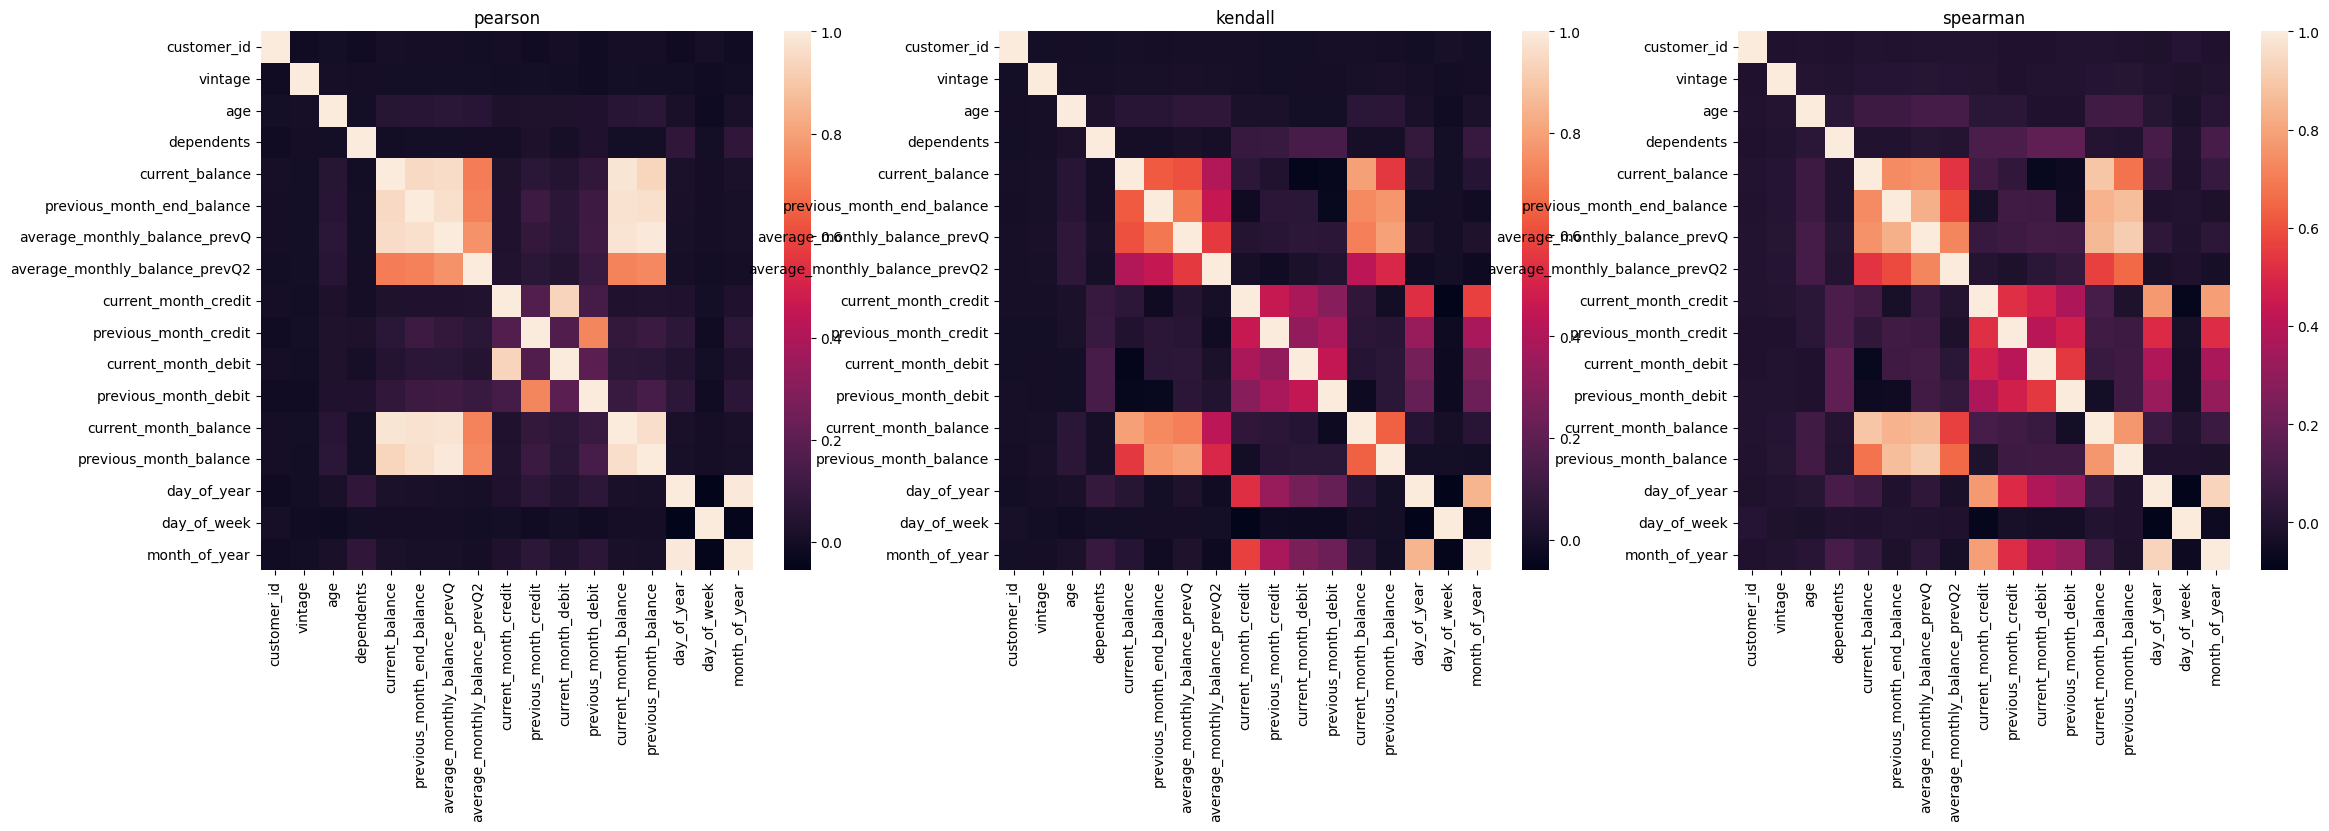

In [38]:
plt.figure(figsize=(27,7))
for i,j in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,i+1)
    plt.title(j)
    sns.heatmap(df.corr(method=j,numeric_only=True))

In [39]:
var=[]
var.extend(current_month)
var.extend(previous_month)
var.extend(prev_quarter)

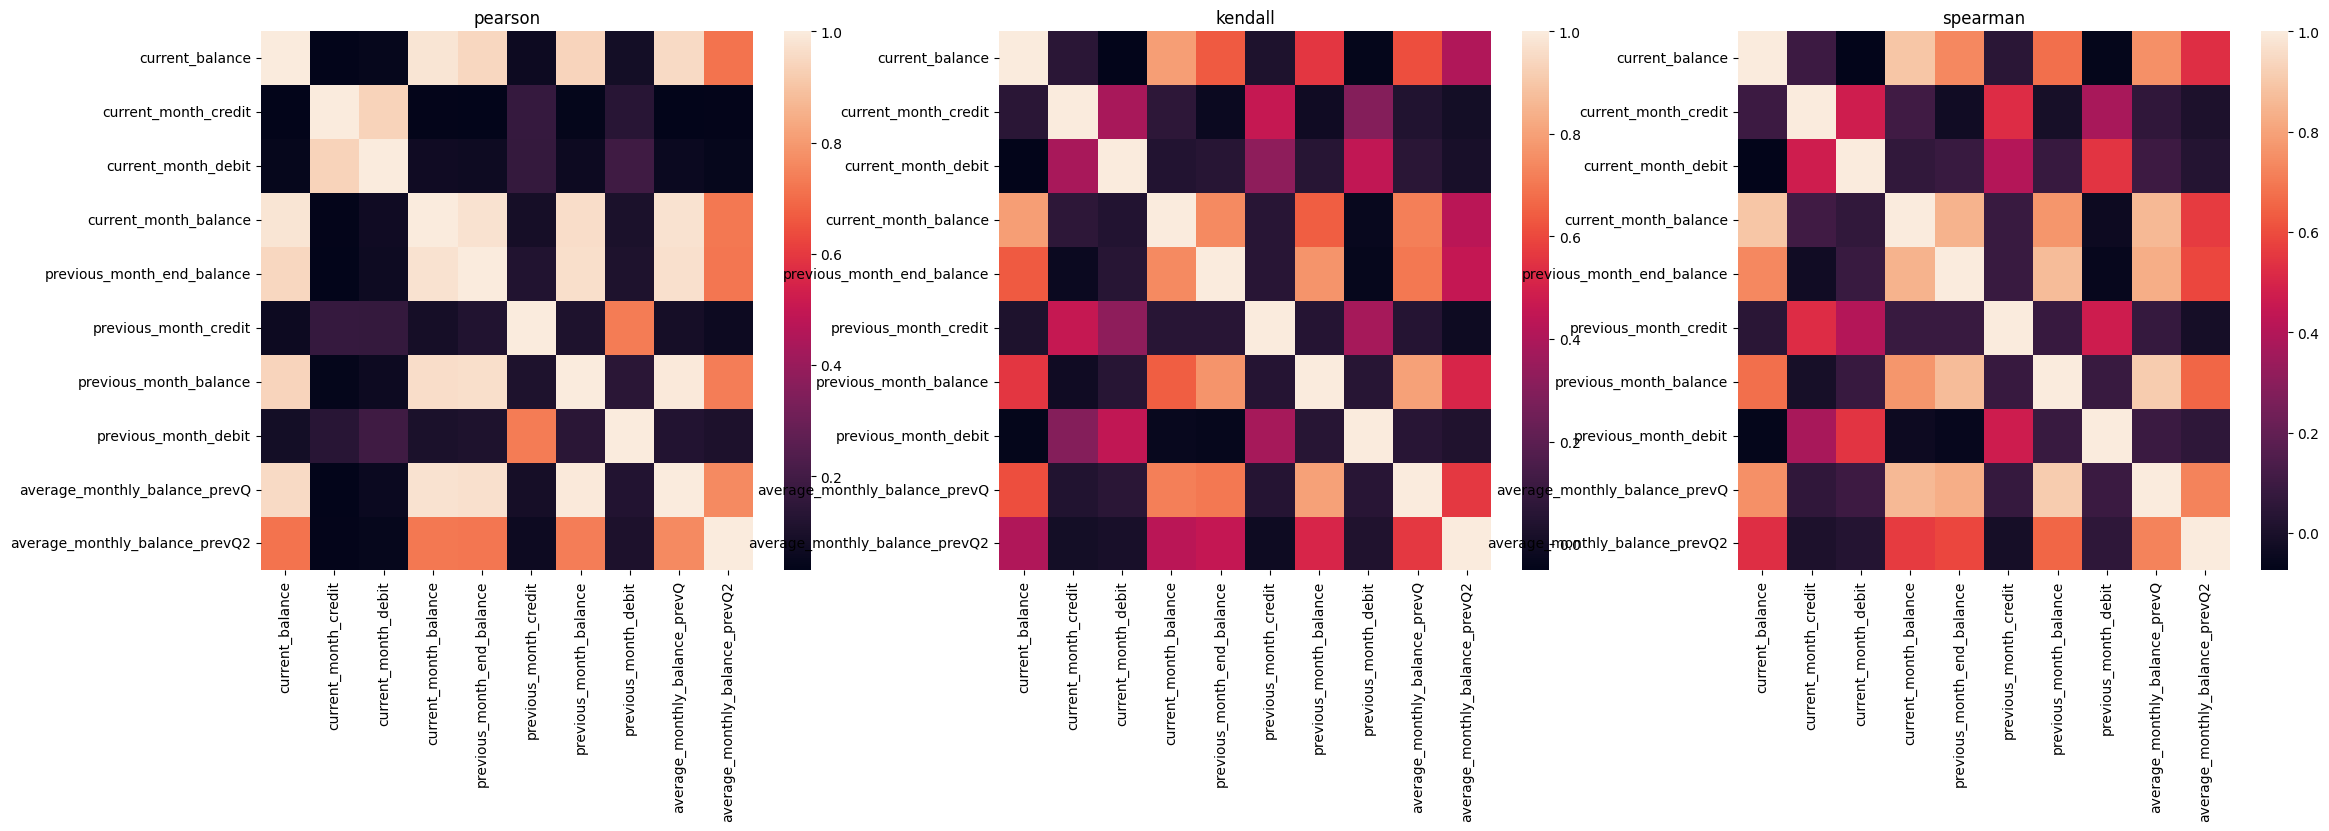

In [40]:
plt.figure(figsize=(27,7))
for i,j in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,i+1)
    plt.title(j)
    sns.heatmap(df[var].corr(method=j))

In [41]:
numerical=df.select_dtypes(exclude=['category'])
numerical.drop(columns=['customer_id'],inplace=True)

In [42]:
transactions=['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']

In [43]:
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

<Figure size 896x672 with 0 Axes>

In [44]:
for i in transactions:
    numerical[i]=numerical[i].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

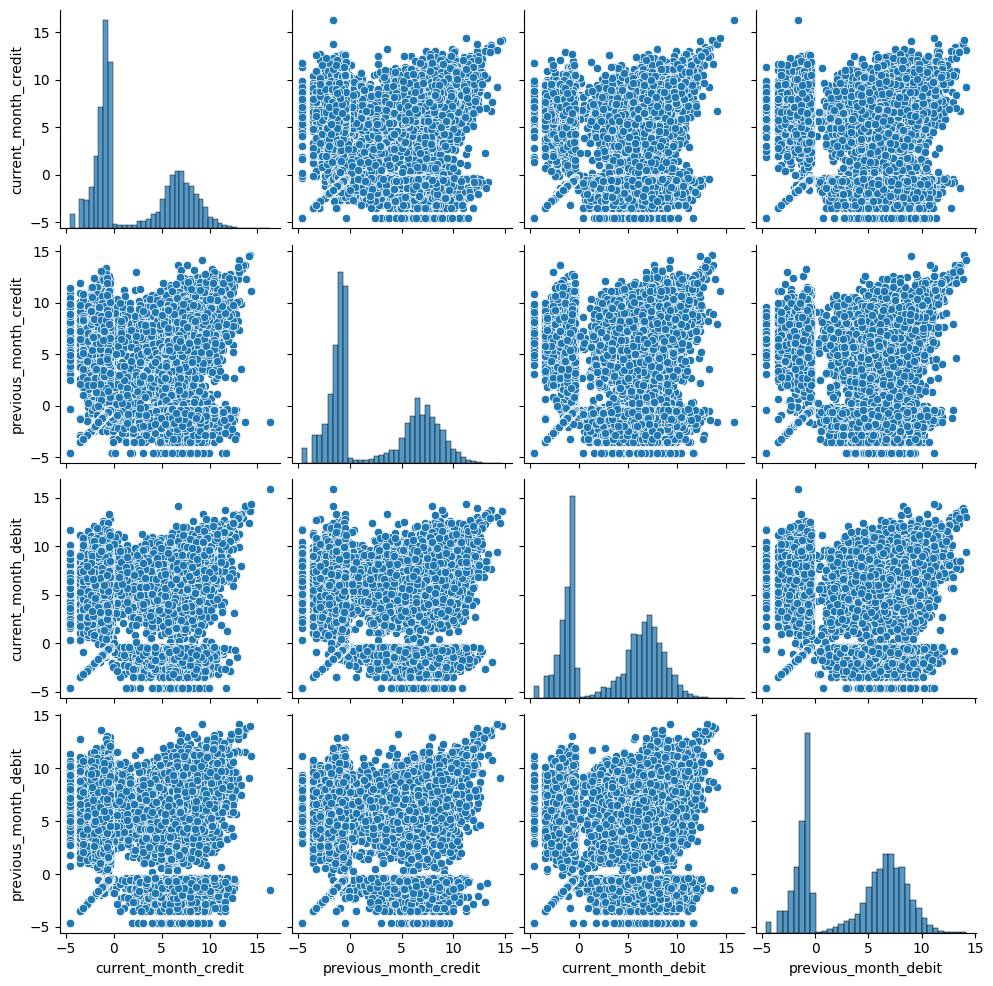

In [45]:
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

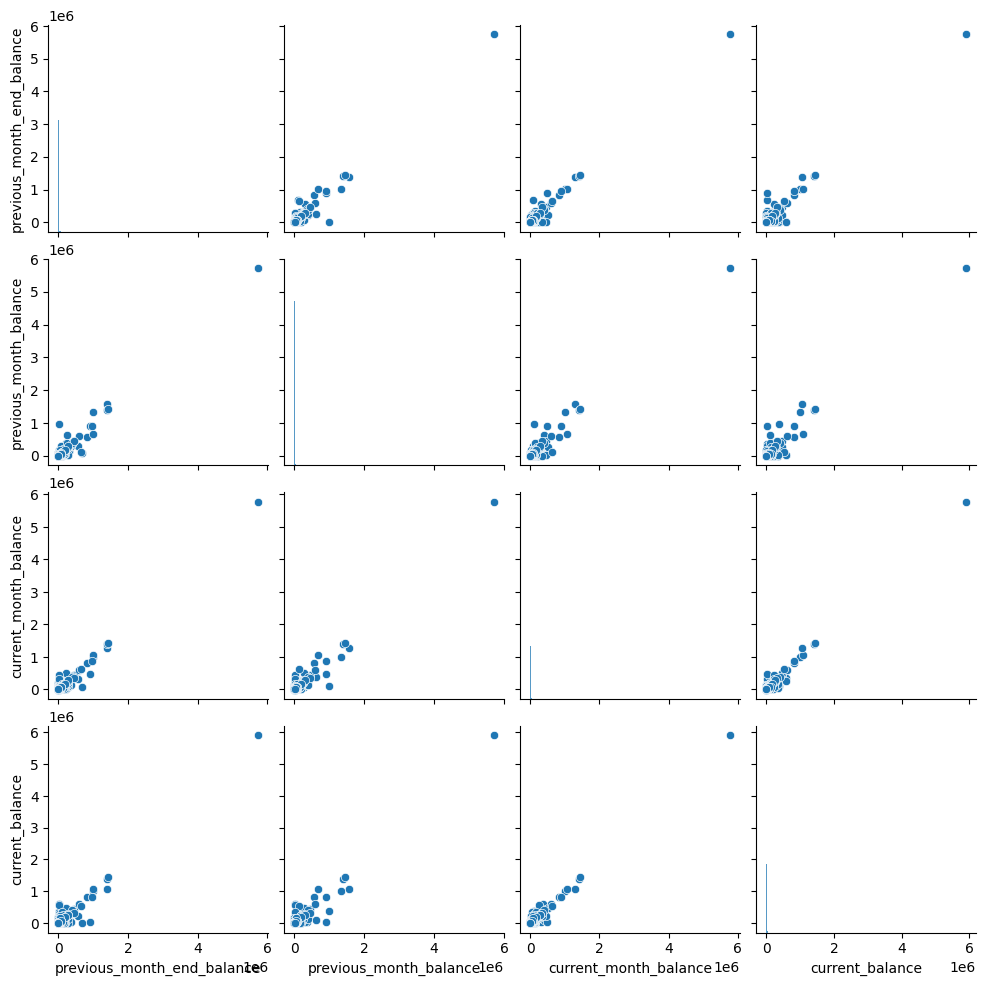

In [46]:
sns.pairplot(numerical[['previous_month_end_balance','previous_month_balance','current_month_balance','current_balance',]])

In [47]:
for i in ['previous_month_end_balance','previous_month_balance','current_month_balance','current_balance',]:
    numerical[i]=numerical[i].map(lambda x : np.log(x))
sns.pairplot(numerical[['previous_month_end_balance','previous_month_balance','current_month_balance','current_balance',]])

C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_9084\35873859.py:2: RuntimeWarning: invalid value encountered in log
  numerical[i]=numerical[i].map(lambda x : np.log(x))


C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_9084\3301423431.py:2: RuntimeWarning: invalid value encountered in log
  numerical.average_monthly_balance_prevQ2=numerical.average_monthly_balance_prevQ2.map(lambda x : np.log(x))


<Axes: xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

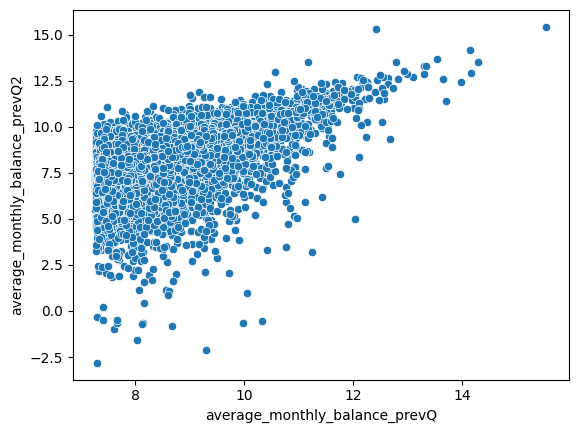

In [48]:
numerical['average_monthly_balance_prevQ']=numerical.average_monthly_balance_prevQ.map(lambda x : np.log(x))
numerical.average_monthly_balance_prevQ2=numerical.average_monthly_balance_prevQ2.map(lambda x : np.log(x))
sns.scatterplot(x=numerical.average_monthly_balance_prevQ,y=numerical.average_monthly_balance_prevQ2)

In [49]:
df.churn=df.churn.astype('int64')
round(df.pivot_table(values='churn',index=['gender','occupation'],columns='customer_nw_category')*100,2)

customer_nw_category       1      2      3
gender occupation                         
Female company        100.00   0.00  66.67
       retired         20.69  11.22  13.49
       salaried        18.55  14.85  17.69
       self_employed   18.11  18.20  18.92
       student         10.40  14.44  15.03
Male   company          0.00   0.00   0.00
       retired         18.50  14.25  16.32
       salaried        17.56  16.41  18.47
       self_employed   22.83  20.42  21.47
       student         16.97  17.21  18.21

In [50]:
age=pd.cut(df.age,[0,25,50,75,100])
df.pivot_table('churn',['gender',age],'occupation',aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 75]         1       34        68            529        0
       (75, 100]        0       18         2             76        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 75]         0      178       261            612        0
       (75, 100]        0       73         3             86        0

In [51]:

round(df.pivot_table('churn',['gender',age],'occupation',)*100,2)

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]        NaN      NaN     15.91          21.77    13.42
       (25, 50]      50.0     0.00     16.10          19.16    15.51
       (50, 75]      50.0    12.69     17.71          17.23      NaN
       (75, 100]      NaN    15.52     33.33          18.45     0.00
Male   (0, 25]        0.0      NaN     20.99          30.33    16.55
       (25, 50]       0.0    14.29     17.35          21.89    21.08
       (50, 75]       0.0    16.05     17.33          19.86     0.00
       (75, 100]      0.0    14.29      9.38          16.29      NaN

In [52]:
balance=pd.qcut(df['current_balance'],3)


In [53]:
df.pivot_table('churn',['gender',age],[balance,'occupation'],aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 75]                      1      24       45           312       0   
       (75, 100]                     0      10        0            41       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 75]                      0     115      147           316       0   
       (75, 100]                     0      41        3            48       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 75]                     0       5       14           109       0   
       (75, 100]                    0       3        0            16       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 75]                     0      22       52           132       0   
       (75, 100]                    0      17        0            11       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 75]                       0       5        9           108       0  
       (75, 100]                      0       5        2            19       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 75]                       0      41       62           164       0  
       (75, 100]                      0      15        0            27       0

In [54]:
round(df.pivot_table('churn',['gender',age],[balance,'occupation'])*100,2)

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                     NaN     NaN    26.32         38.60   21.26   
       (25, 50]                   50.0    0.00    32.30         33.68   25.97   
       (50, 75]                  100.0   27.27    35.16         30.03     NaN   
       (75, 100]                   NaN   31.25      NaN         36.28    0.00   
Male   (0, 25]                     0.0     NaN    35.29         52.00   28.19   
       (25, 50]                    0.0    0.00    33.37         38.90   44.12   
       (50, 75]                    0.0   30.03    32.24         32.92     NaN   
       (75, 100]                   0.0   28.08    27.27         34.04     NaN   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                    NaN     NaN     5.88         10.81    7.17   
       (25, 50]                 100.0    0.00     9.83         10.89    6.86   
       (50, 75]                   NaN    4.85    11.48         11.00     NaN   
       (75, 100]                  NaN    7.69     0.00         11.43     NaN   
Male   (0, 25]                    NaN     NaN    14.29         14.12    6.49   
       (25, 50]                   0.0   16.67    11.89         13.21   12.35   
       (50, 75]                   0.0    5.80    10.90         13.36     NaN   
       (75, 100]                  0.0    9.24     0.00          7.33     NaN   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                      NaN     NaN    12.50          3.33   10.24  
       (25, 50]                     0.0     NaN     6.70         11.99   16.67  
       (50, 75]                     0.0    6.49     6.72         10.37     NaN  
       (75, 100]                    NaN   11.11    66.67         11.95     NaN  
Male   (0, 25]                      NaN     NaN     5.26         16.95   12.02  
       (25, 50]                     0.0   20.00     9.01         12.06    9.46  
       (50, 75]                     0.0   11.82    10.82         14.47    0.00  
       (75, 100]                    0.0    8.29     0.00         11.39     NaN

In [55]:
def grouped_boxplot(x,y,hue):
    sns.boxplot(df,x=x,y=y,hue=hue,orient='v')
    

In [56]:
grouped_boxplot('occupation','age','churn')

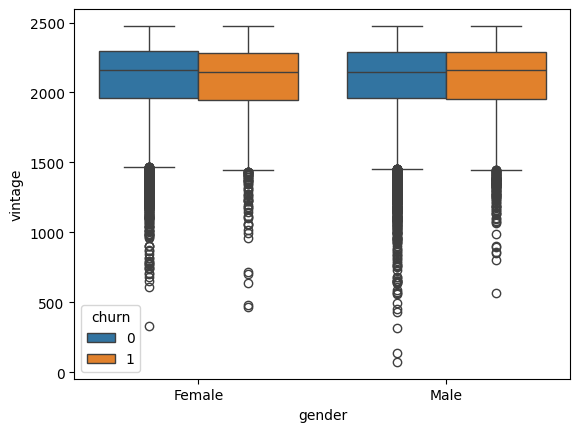

In [57]:
grouped_boxplot('gender','vintage','churn')

In [58]:
bal=['current_balance','previous_month_balance','current_month_balance','previous_month_end_balance']

In [59]:
tempdf=pd.DataFrame()
for i in bal:
    tempdf[i]=np.log(df[i])
tempdf['churn']=df['churn']

C:\Users\Atharv Karchi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Atharv Karchi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Atharv Karchi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Atharv Karchi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
sns.pairplot(tempdf,hue='churn',vars=bal)

In [61]:
bal=['current_month_debit','previous_month_debit','current_month_credit','previous_month_credit']
tempdf=pd.DataFrame()
for i in bal:
    tempdf[i]=np.log(df[i])
tempdf['churn']=df['churn']
sns.pairplot(tempdf,hue='churn',vars=bal)

In [62]:
cols=df.isnull().sum()[df.isnull().sum()>0].index

In [63]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')

In [64]:
df[cols]=impute.fit_transform(df[cols])

In [65]:
df=pd.concat([df,pd.get_dummies(df['gender'],)*1],axis=1)

In [66]:
df=pd.concat([df,pd.get_dummies(df['occupation'],)*1],axis=1)
df=pd.concat([df,pd.get_dummies(df['customer_nw_category'],prefix='nw_category',)*1],axis=1)

In [67]:
df.drop(columns=['gender','occupation','customer_nw_category'],inplace=True)

In [68]:
branch_code=pd.cut(df.groupby('branch_code')['churn'].mean().sort_values(ascending=False),[-0.1,0.146,0.3,0.5,1],labels=[1,2,3,4])

C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_9084\892012007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_code=pd.cut(df.groupby('branch_code')['churn'].mean().sort_values(ascending=False),[-0.1,0.146,0.3,0.5,1],labels=[1,2,3,4])


In [69]:
df['code_group']=df['branch_code'].map(lambda x: branch_code[x])
df['code_group'].value_counts()
    

code_group
2    13513
1    11276
3     3125
4      468
Name: count, dtype: int64

In [70]:
df=pd.concat([df.drop(columns=['code_group','branch_code']),pd.get_dummies(df['code_group'],prefix='Branch',)*1],axis=1)

In [71]:
df.dependents=df.dependents.astype('int64')

In [72]:
cities=pd.cut(df.groupby('city').mean()['churn'],bins=[-0.001,0.2,0.5,.9,1],labels=[1,2,3,4])

In [73]:
df['city_group']=df['city'].map(lambda x: cities[x])

In [74]:
df=pd.concat([df.drop(columns=['city','city_group']),pd.get_dummies(df.city_group,prefix='city')*1],axis=1)

In [75]:
df.day_of_year=df.day_of_year.astype('int64')
df.day_of_week=df.day_of_week.astype('int64')
df.month_of_year=df.month_of_year.astype('int64')

In [76]:
df.drop(columns=['customer_id'],inplace=True)

In [77]:
Y=df['churn']

In [78]:
X=df.drop(columns=['churn'])
X.columns=X.columns.astype('str')

In [79]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(X,Y,stratify=Y,random_state=64)

In [80]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 34), (7096, 34), (21286,), (7096,))

In [81]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [82]:
cols=X.columns
train_x=minmax.fit_transform(train_x)
test_x=minmax.fit_transform(test_x)
train_x=pd.DataFrame(train_x,columns=cols)
test_x=pd.DataFrame(test_x,columns=cols)

In [90]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR(max_iter=1000,n_jobs=-1)

In [91]:
lr.fit(train_x,train_y)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [92]:
lr.score(test_x,test_y)

0.826381059751973